## **EDA :** Weather AUS

#### _Rain in Australia_

🟢 `complete`

---

1. **Identification générale**
    * Structure
    * Données cibles
    * Types de données
    * Contenu des données
    * Préparation
    * Conclusion
2. **Analyse univariée**
    * Cible
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
3. **Analyse bivariée**
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
    * Statistiques
4. **Finalisation**
    * Conclusion
    * Traitements

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**User Code**

In [2]:
draw = False

**Notebook setup**

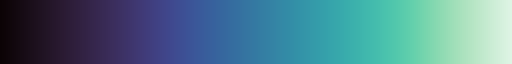

In [20]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#c2e800'
default_c = '#336699'
palette_c = [
    '#b8e600', # Sunny
    '#00bfff' # Rainy
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display crest, mako, rocket, icefire ...
sns.color_palette("mako", as_cmap=True)

**Weather AUS**

[Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

In [5]:
weather_file_path = './_datasets/weatherAUS_data.csv'
weather_data = pd.read_csv(weather_file_path)

weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


**Notes**
* `Wet Season` : approx. du 1<sup>er</sup> novembre au 30 avril
* `Dry Season` : approx. du 1<sup>er</sup> mai au 31 octobre

---
### **1.** Identification générale

##### **1.1** - Structure

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

##### **1.2** - Données cibles

In [8]:
# (!) - Content `Yes`, `No` and `nan`
weather_data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

##### **1.3** - Types de données

In [9]:
pd.DataFrame({
    'Quantité de valeurs': weather_data.dtypes.value_counts()
})

,Quantité de valeurs
float64,16
object,7


In [10]:
pd.DataFrame({
    'Valeurs minimums (float)': weather_data.select_dtypes(np.float64).min(),
    'Valeurs maximums (float)': weather_data.select_dtypes(np.float64).max()
}, dtype=np.float64)

,Valeurs minimums (float),Valeurs maximums (float)
MinTemp,-8.5,33.9
MaxTemp,-4.8,48.1
Rainfall,0.0,371.0
Evaporation,0.0,145.0
Sunshine,0.0,14.5
WindGustSpeed,6.0,135.0
WindSpeed9am,0.0,130.0
WindSpeed3pm,0.0,87.0
Humidity9am,0.0,100.0
Humidity3pm,0.0,100.0


In [11]:
weather_data.select_dtypes(np.object_)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
...,...,...,...,...,...,...,...
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No
145459,2017-06-25,Uluru,NaN,ESE,ESE,No,NaN


##### **1.4** - Contenu des données

Valeurs nulles

In [12]:
pd.DataFrame({
    'Quantité de valeurs nulles': weather_data.isnull().sum(),
    'Pourcentage de valeurs nulles': (weather_data.isnull().sum() / weather_data.shape[0]) * 100,
}).sort_values(by='Quantité de valeurs nulles', ascending=False)

,Quantité de valeurs nulles,Pourcentage de valeurs nulles
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [ ]:
# (!) - Missings on numeric values
if draw :
    plt.figure(figsize=(26,26))
    plt.title("Valeurs manquantes dans les variables numériques\n")
    sns.heatmap(weather_data.select_dtypes(np.float64).isnull(), cbar=False)
    plt.show()

_HiRes graphic in `./_outputs` directory_

<img src="./_outputs/weatherAUS_missing_numerics.png" alt="visualization of missing numerics" title="Valeurs numériques manquantes" width="151" height="148">

In [14]:
# (!) - Missings on text values
if draw :
    plt.figure(figsize=(26,26))
    plt.title("Valeurs manquantes dans les variables textuelles\n")
    sns.heatmap(weather_data.select_dtypes(np.object_).isnull(), cbar=False)
    plt.show()

_HiRes graphic in `./_outputs` directory_

<img src="./_outputs/weatherAUS_missing_texts.png" alt="visualization of missing texts" title="Valeurs textuelles manquantes" width="151" height="148">

Valeurs uniques

In [15]:
weather_data.select_dtypes(np.object_).nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [16]:
weather_data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [17]:
weather_data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [18]:
weather_data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [19]:
weather_data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [8]:
# (!) - Special case for 'Cloud**'
display(
    weather_data['Cloud9am'].unique(),
    weather_data['Cloud3pm'].unique()
)

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.])

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.])

Valeurs dupliquées

In [23]:
# (!) - `Sydney` and `SydneyAirport` ? No
# sydney = weather_data.loc[
#     (weather_data['Location'] == 'Sydney') | 
#     (weather_data['Location'] == 'SydneyAirport')
# ]

# for col in ['Pressure3pm', 'Evaporation', 'Sunshine', 'Cloud3pm', 'WindGustSpeed', 'Temp3pm', 'Humidity3pm'] :
#     display( sydney[[col, 'RainTomorrow']].groupby('RainTomorrow').describe() )

In [ ]:
# (!) - `Melbourne` and `MelbourneAirport` ? No
# melbourne = weather_data.loc[
#     (weather_data['Location'] == 'Melbourne') | 
#     (weather_data['Location'] == 'MelbourneAirport')
# ]

# for col in ['Pressure3pm', 'Evaporation', 'Sunshine', 'Cloud3pm', 'WindGustSpeed', 'Temp3pm', 'Humidity3pm'] :
#     display( melbourne[[col, 'RainTomorrow']].groupby('RainTomorrow').describe() )

##### **1.5** - Préparation

In [6]:
# (!) - Extract column names for variables
continous = weather_data.select_dtypes(np.float64).columns.to_list()
continous.remove('Cloud9am')
continous.remove('Cloud3pm')
continous.remove('Rainfall') # [!] - Specific case...

discretes = ['Cloud9am', 'Cloud3pm']

categoricals = weather_data.select_dtypes(np.object_).columns.to_list()
categoricals.remove('RainTomorrow')

print(continous)
print(discretes)
print(categoricals)

['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Cloud9am', 'Cloud3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


##### **1.6** - Conclusion

> —
>
> ✔️ Les valeurs pour **Sydney** et **SydneyAirport**, ainsi que **Melbourne** et **MelbourneAirport** ne sont pas des doublons.
>
> ✔️ Les entrées enregistrées aux heures `*_9am` et `*_3pm`, ainsi que les `MinTemp` et `MaxTemp`, seront probablement fusionnées et moyennées ; ou seulement une de chaque sera conservée.
>
> ✔️ La variable `Rainfall` sera probablement supprimée puisqu'elle affiche une description statistique farfelue.
>
> ✔️ Les variables `Sushine` et `Evaporation` comportent presque 50% de valeurs nulles.
> 
> —

---
### **2.** Analyse univariée

##### **2.1** - Cible

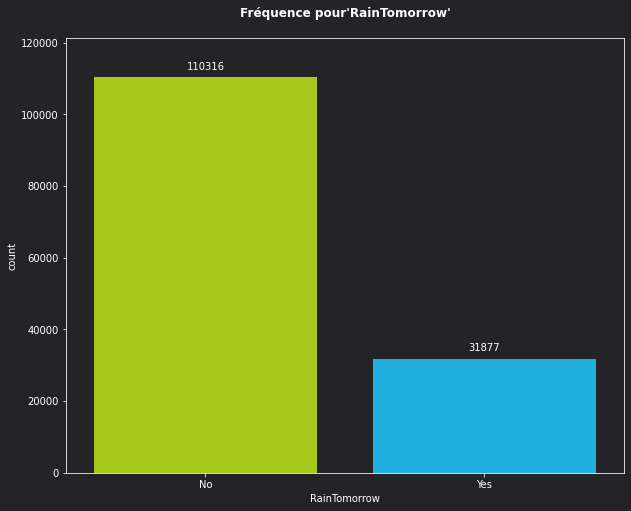

In [161]:
if draw :
    hgt = weather_data['RainTomorrow'].value_counts().max()

    plt.figure(figsize=(10, 8))
    plt.title("Fréquence pour'RainTomorrow'\n")
    ax = sns.countplot(data=weather_data.sort_values('RainTomorrow'), x='RainTomorrow', palette=palette_c)
    ax.bar_label(ax.containers[0], padding=6)
    plt.ylim(top=hgt*1.1)
    plt.show()

In [7]:
cnt = weather_data[['RainTomorrow']].groupby('RainTomorrow').value_counts()
pct = (cnt / weather_data.shape[0]) * 100

pd.DataFrame({
    'Quantité': cnt,
    'Pourcentage': pct
}).reset_index()

,RainTomorrow,Quantité,Pourcentage
0,No,110316,75.839406
1,Yes,31877,21.914616


**Observations**

> —
> 
> ❕ Environ **76 %** du dataset comporte des jours pour lesquels il a plu le lendemain.
> 
> ❓ _Quelle est la fréquence des lendemains pluvieux par rapport aux `RainToday` ? Quels étaient le taux `Humidity` moyen, le volume de `Rainfall`, l'intensité `Cloud` moyenne ?_
>
> —

##### **2.2** - Variables quantitatives continues

Fréquences et densités

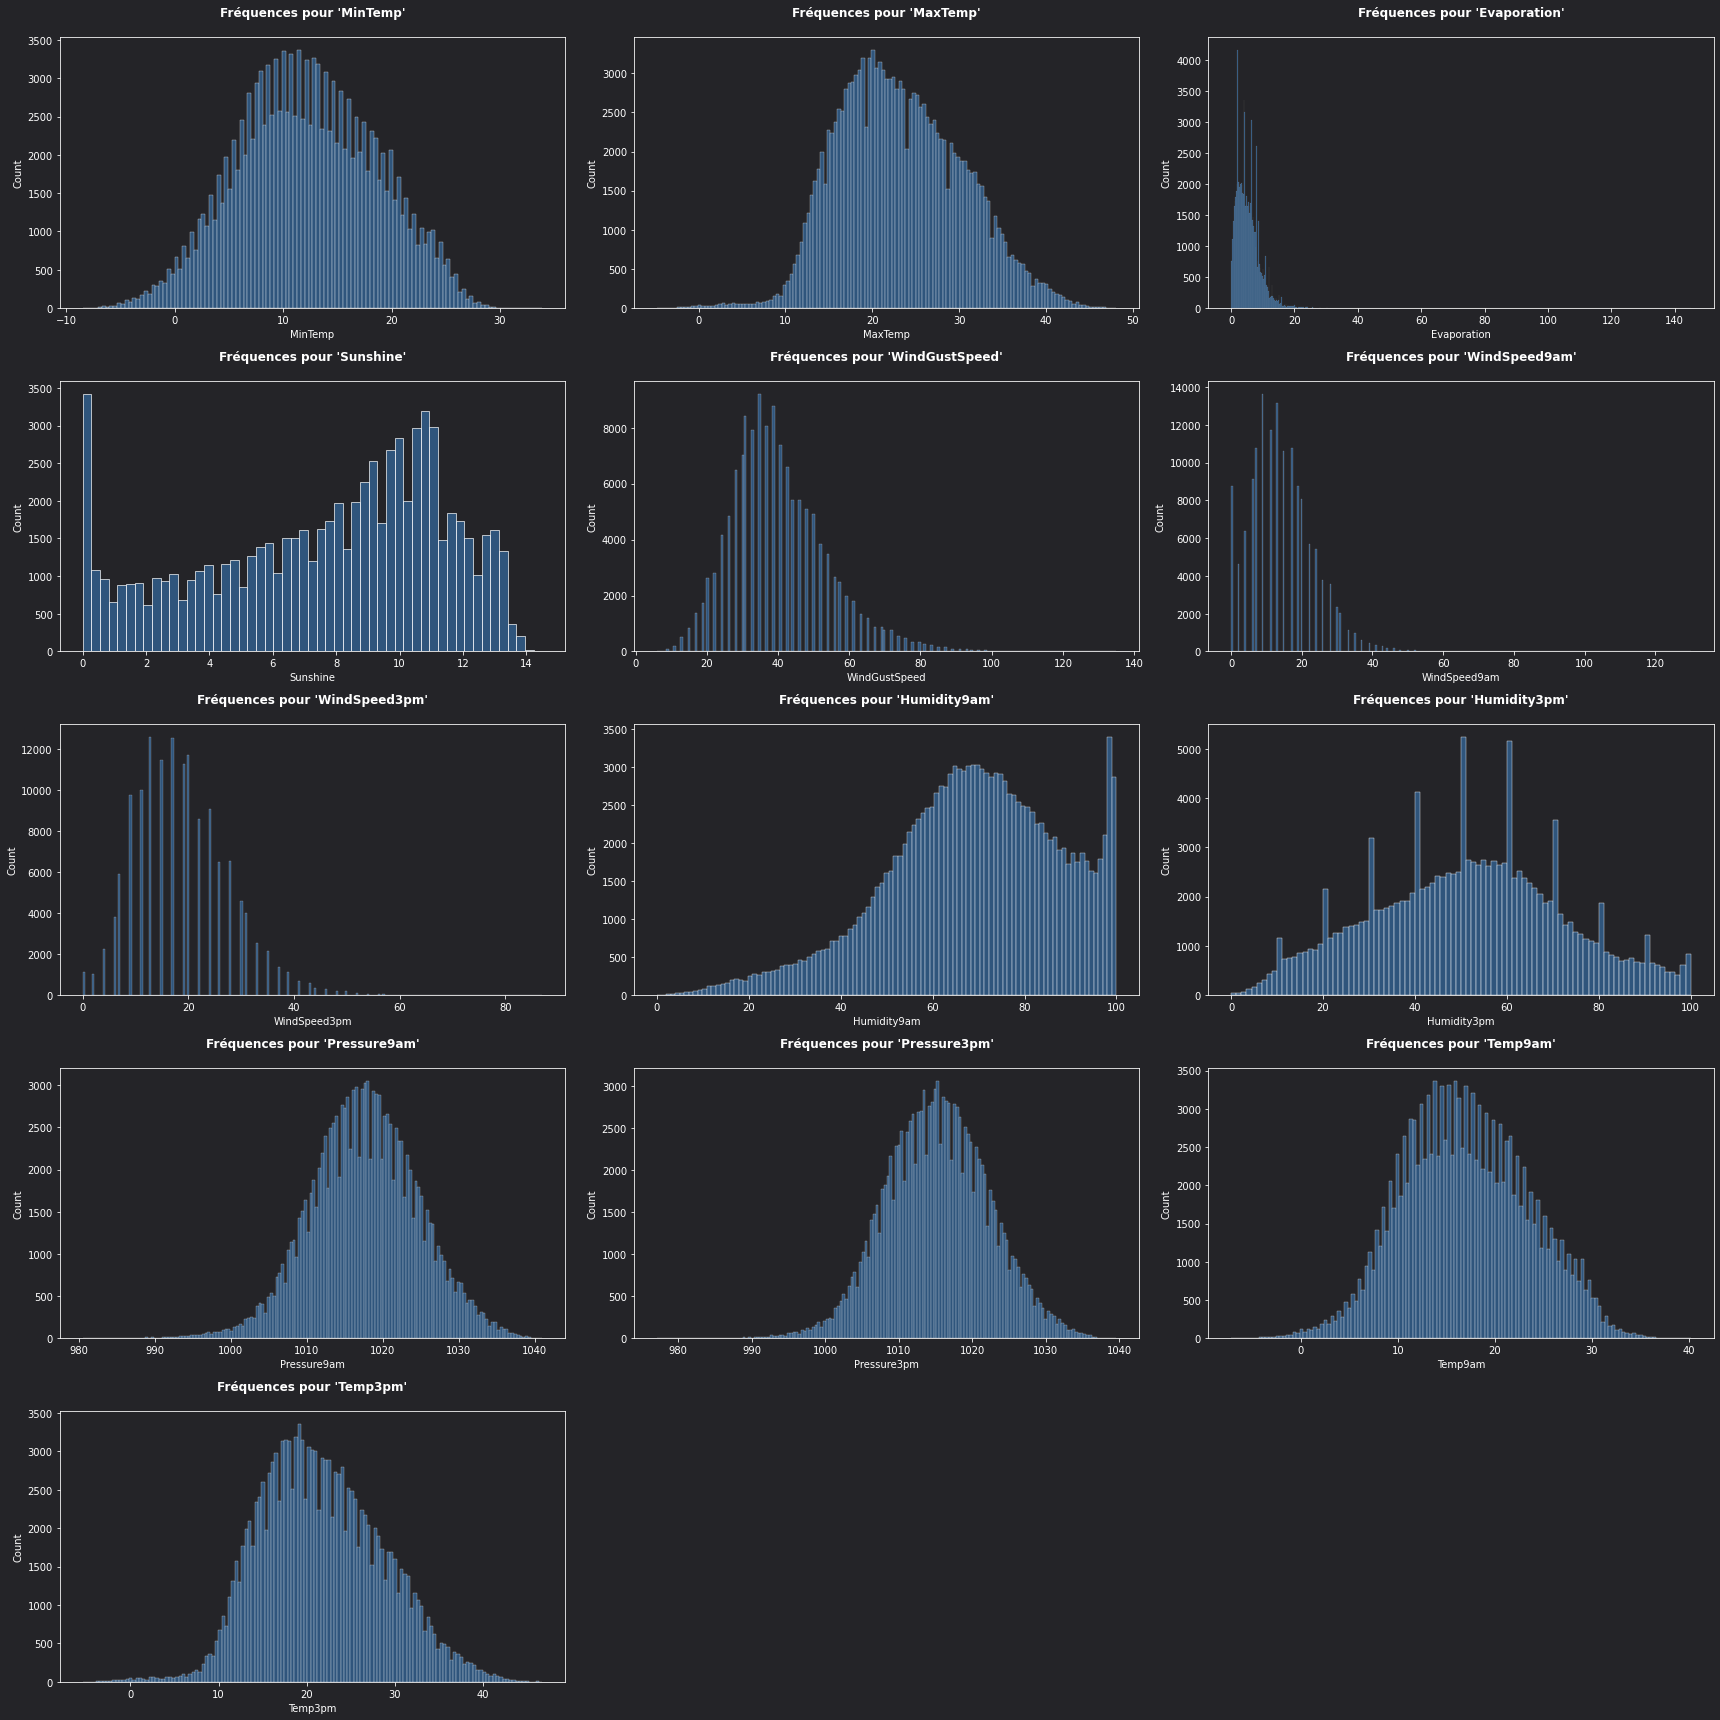

In [60]:
if draw :
    plt.figure(figsize=(24, 24), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(5, 3, i+1)
        plt.title(f"Fréquences pour '{col}'\n")
        sns.histplot(data=weather_data, x=col, fill=True, color=default_c)
    plt.show()

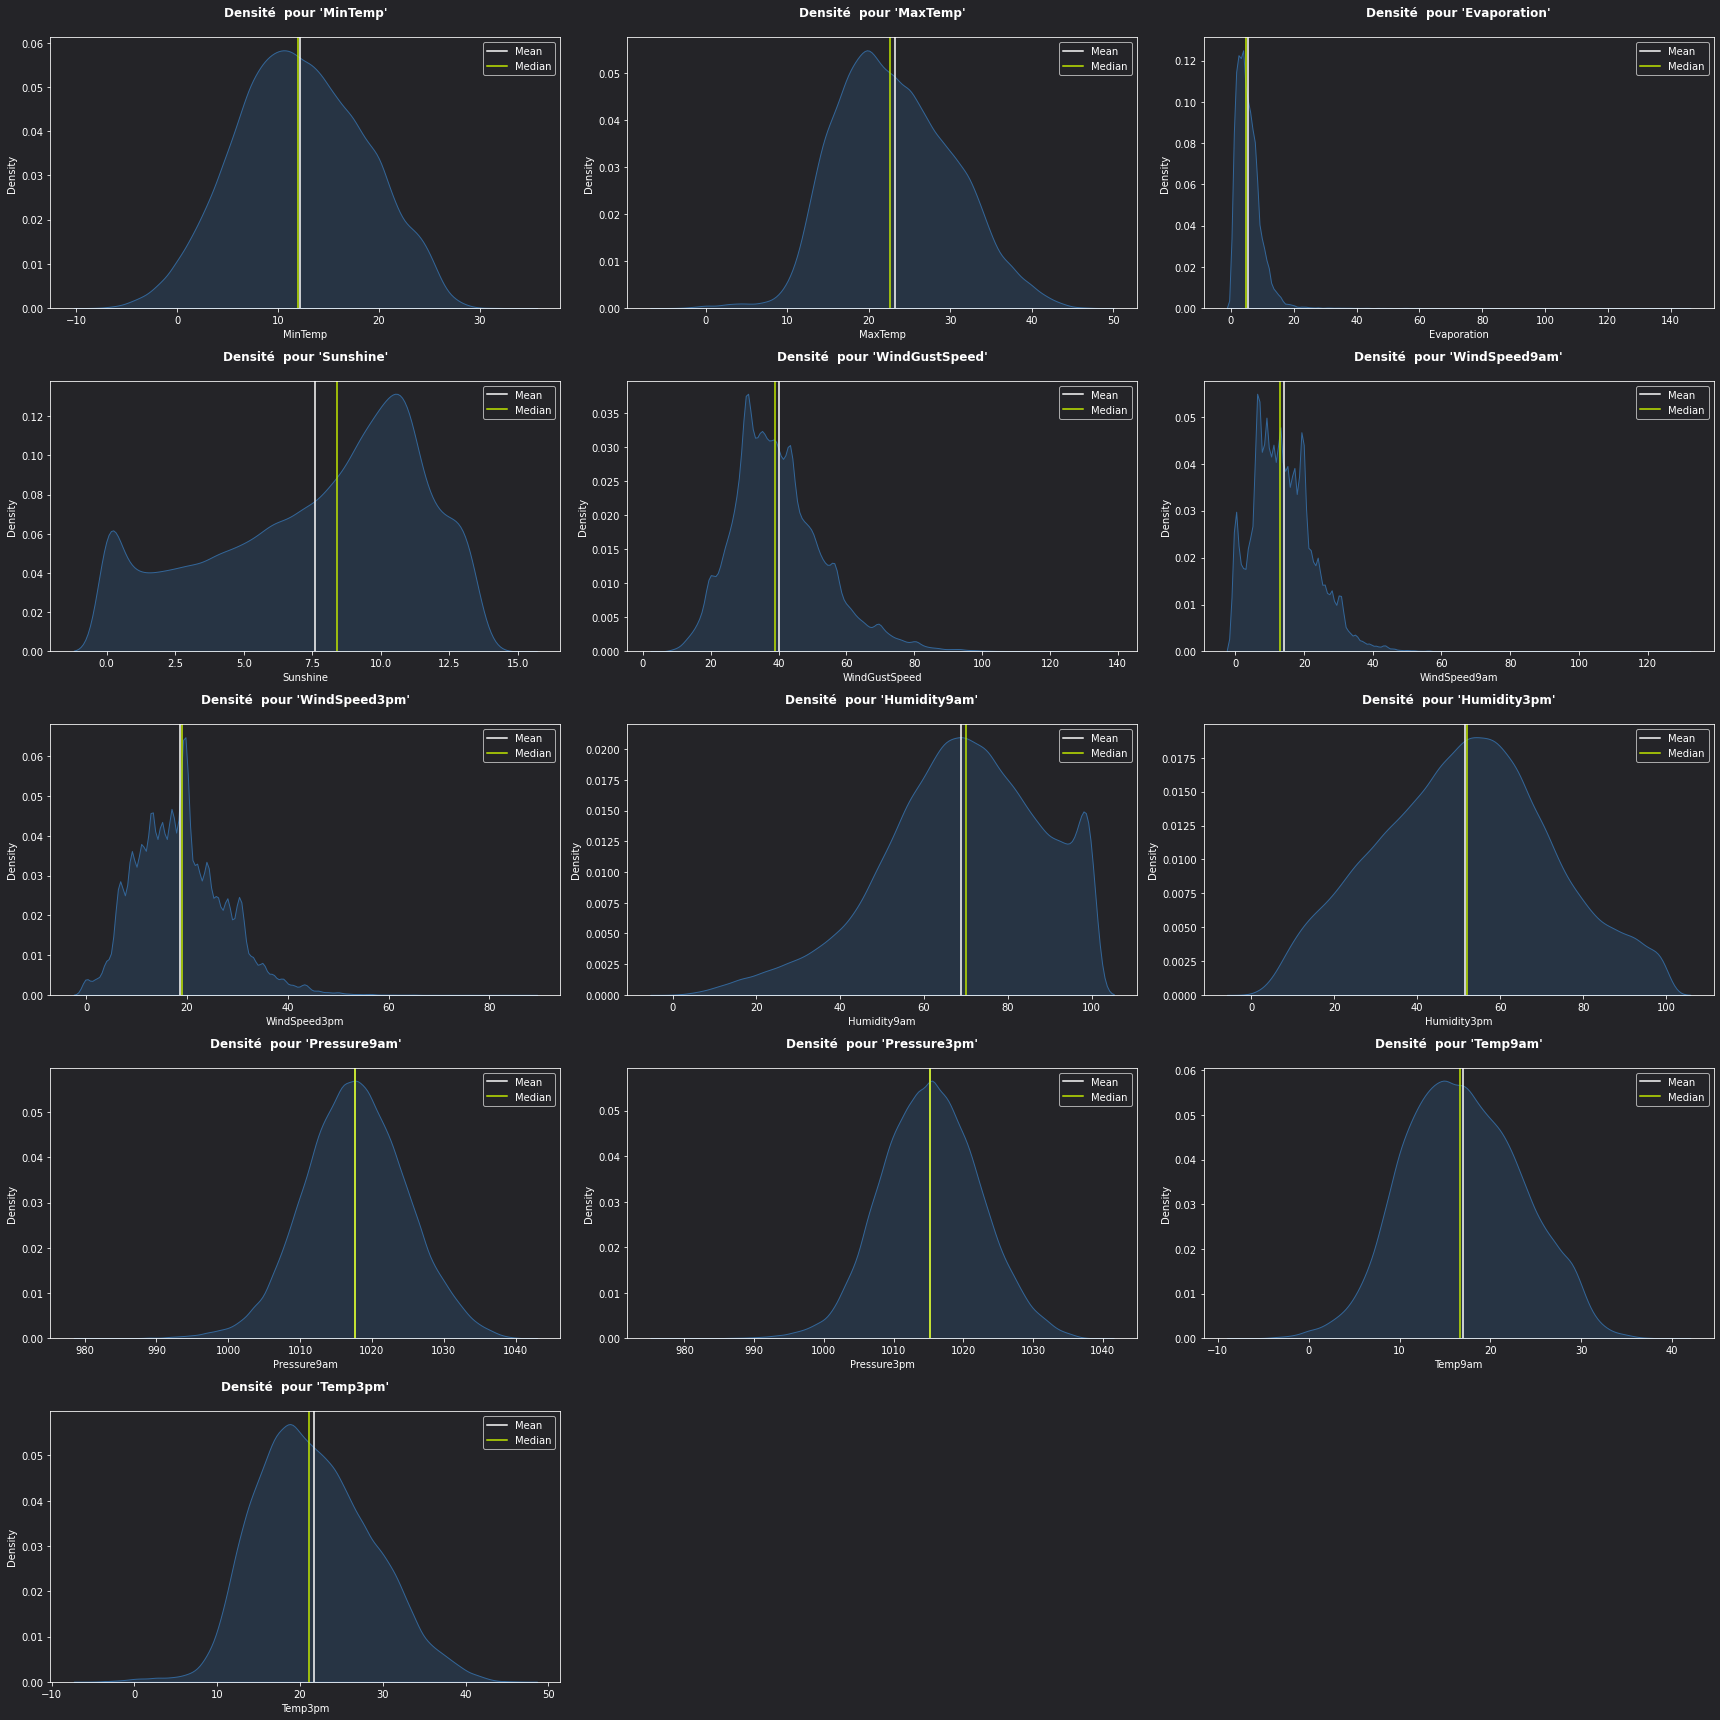

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
mean,12.194034,23.221348,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


In [160]:
if draw :
    plt.figure(figsize=(24, 24), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(5, 3, i+1)
        plt.title(f"Densité pour '{col}'\n")
        sns.kdeplot(data=weather_data, x=col, fill=True, color=default_c)
        plt.axvline(weather_data[col].mean(), c=mean_c, label='Mean')
        plt.axvline(weather_data[col].median(), c=median_c, label="Median")
        plt.legend()
    plt.show()

    weather_data[continous].describe().iloc[1:]

Variable `Rainfall`

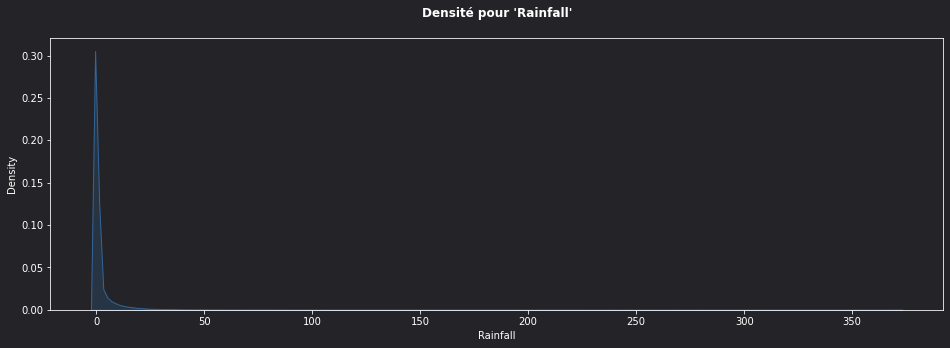

In [62]:
if draw :
    plt.figure(figsize=(16, 5))
    plt.title(f"Densité pour 'Rainfall'\n")
    sns.kdeplot(data=weather_data, x='Rainfall', fill=True, color=default_c)
    plt.show()

In [9]:
weather_data[['Rainfall']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall,142199.0,2.360918,8.47806,0.0,0.0,0.0,0.8,371.0


Valeurs aberrantes

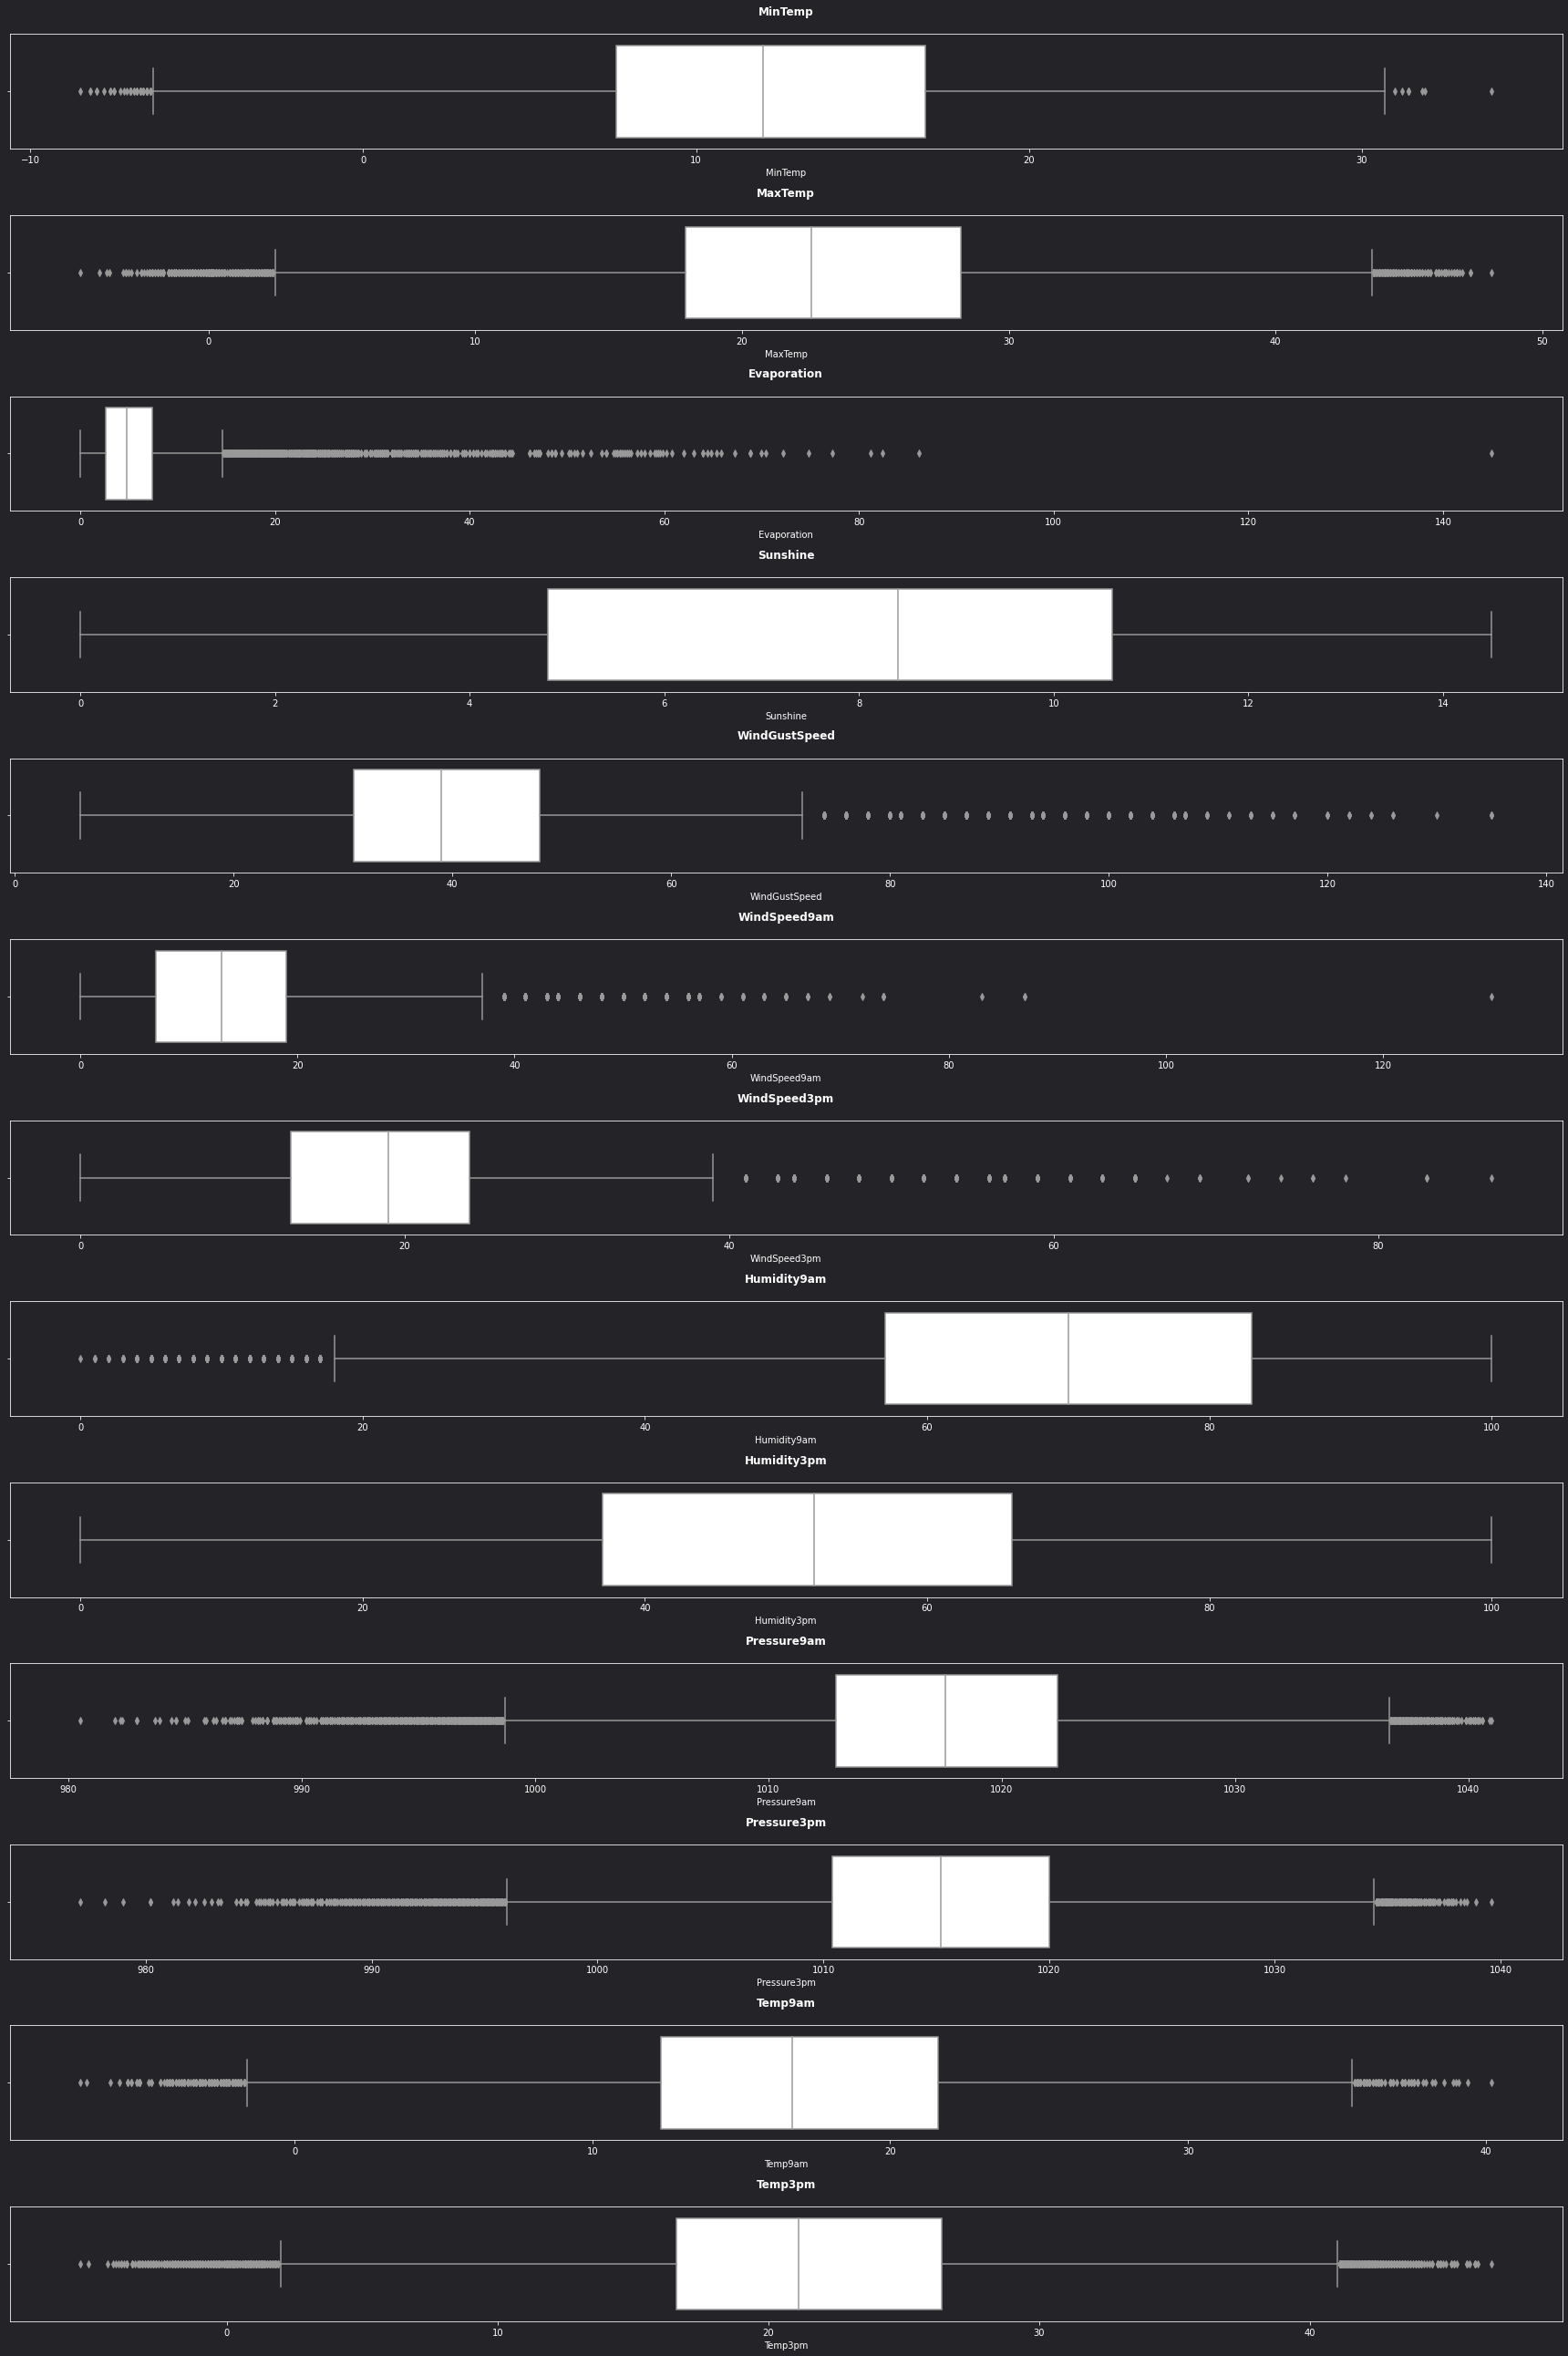

In [63]:
if draw :
    plt.figure(figsize=(24, 36), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(13, 1, i+1)
        plt.title(f"{col}\n")
        sns.boxplot(data=weather_data, x=col, color="#FFFFFF")
    plt.show()

In [31]:
q25 = weather_data[['MinTemp', 'MaxTemp', 'Evaporation', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].quantile(.25)
q75 = weather_data[['MinTemp', 'MaxTemp', 'Evaporation', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].quantile(.75)
iqr = q75 - q25
lows = q25 - (1.5 * iqr)
ups = q75 + (1.5 * iqr)

pd.DataFrame({
    'Limite inférieure': lows,
    'Limite suppérieure': ups,
})

,Limite inférieure,Limite suppérieure
MinTemp,-6.35,30.85
MaxTemp,2.45,43.65
Evaporation,-4.60,14.60
Pressure9am,998.65,1036.65
Pressure3pm,996.00,1034.40
Temp9am,-1.65,35.55
Temp3pm,1.90,41.10


In [32]:
print(f"Entrées où 'Evaporation' est supérieure à {ups['Evaporation']} :")
age_hi_outliers = weather_data.loc[weather_data['Evaporation'] > ups['Evaporation']].sort_values('Evaporation')

display(age_hi_outliers)

cnt = age_hi_outliers[['RainTomorrow']].groupby('RainTomorrow').value_counts()
pct = (cnt / weather_data.shape[0]) * 100 

pd.DataFrame({
    'Quantité : Evaporation > 14.6': cnt,
    'Pourcentage : Evaporation > 14.6': pct
}).reset_index()

Entrées où 'Evaporation' est supérieure à 14.600000000000001 :


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
27445,2009-10-06,Richmond,8.3,21.3,0.0,14.7,NaN,E,30.0,S,...,78.0,47.0,1020.6,1015.9,NaN,NaN,14.2,19.9,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
96578,2009-03-16,Adelaide,14.3,20.0,6.0,14.8,3.2,WSW,41.0,S,...,90.0,54.0,1018.6,1018.4,NaN,NaN,15.2,19.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106968,2013-01-07,Woomera,24.6,45.3,0.0,82.4,NaN,SE,74.0,ESE,...,22.0,9.0,1013.8,1009.4,0.0,1.0,31.8,44.0,No,No
8831,2016-11-11,Cobar,19.1,35.3,0.0,86.2,NaN,NNW,35.0,NW,...,NaN,NaN,1009.3,1004.6,NaN,NaN,26.7,34.1,No,No
42358,2016-12-19,Williamtown,15.3,23.9,58.2,145.0,NaN,NaN,NaN,NaN,...,72.0,52.0,1020.8,1017.0,8.0,1.0,19.1,23.0,Yes,No


,RainTomorrow,Quantité : Evaporation > 14.6,Pourcentage : Evaporation > 14.6
0,No,1735,1.192768
1,Yes,219,0.150557


**Observations**

> — 
> 
> ❕ Les valeurs de la variable `Rainfal` sont très (trop) incohérentes. La variable `Evaporation` présente une distribution très éloignée de la normale et beaucoup de valeurs aberrantes. 
> 
> —

##### **2.3** - Variables quantitatives discrètes

Fréquence

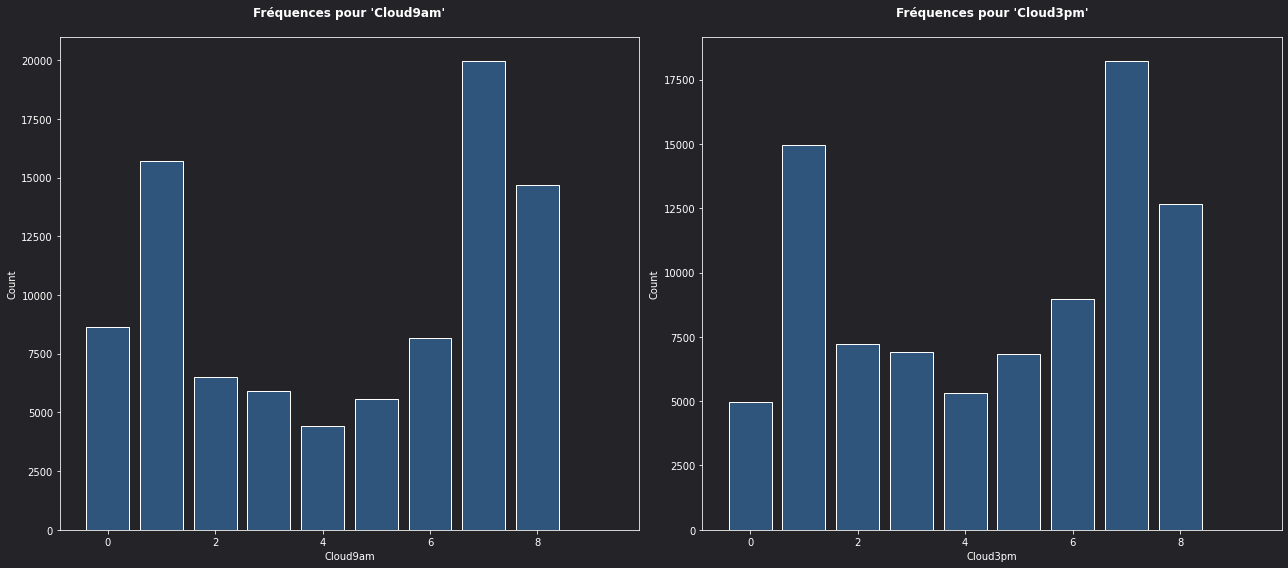

In [64]:
if draw :
    plt.figure(figsize=(18, 8), layout='tight')
    for i, col in enumerate(discretes) :
        plt.subplot(1, 2, i+1)
        plt.title(f"Fréquences pour '{col}'\n")
        sns.histplot(data=weather_data, x=col, fill=True, discrete=True, shrink=.8, color=default_c)
    plt.show()

In [12]:
weather_data[['Cloud9am', 'Cloud3pm']].describe().T

,count,mean,std,min,25%,50%,75%,max
Cloud9am,89572.0,4.447461,2.887159,0.0,1.0,5.0,7.0,9.0
Cloud3pm,86102.0,4.509930,2.720357,0.0,2.0,5.0,7.0,9.0


**Observation**

> — 
> 
> ❕ Les distributions de `Cloud9am` et `Cloud3pm` sont très similaires. 
>
> ❓ _Est-ce les variables `Cloud9am` et `Cloud3pm` présente une distribution différente lorsqu'elles sont croisées avec la cible ? Est-ce la variable `Cloud3pm` est plus corrélée avec la cible que la variable `Cloud9pm` ?_ 
> 
> —

##### **2.4** - Variables qualitatives

Fréquence

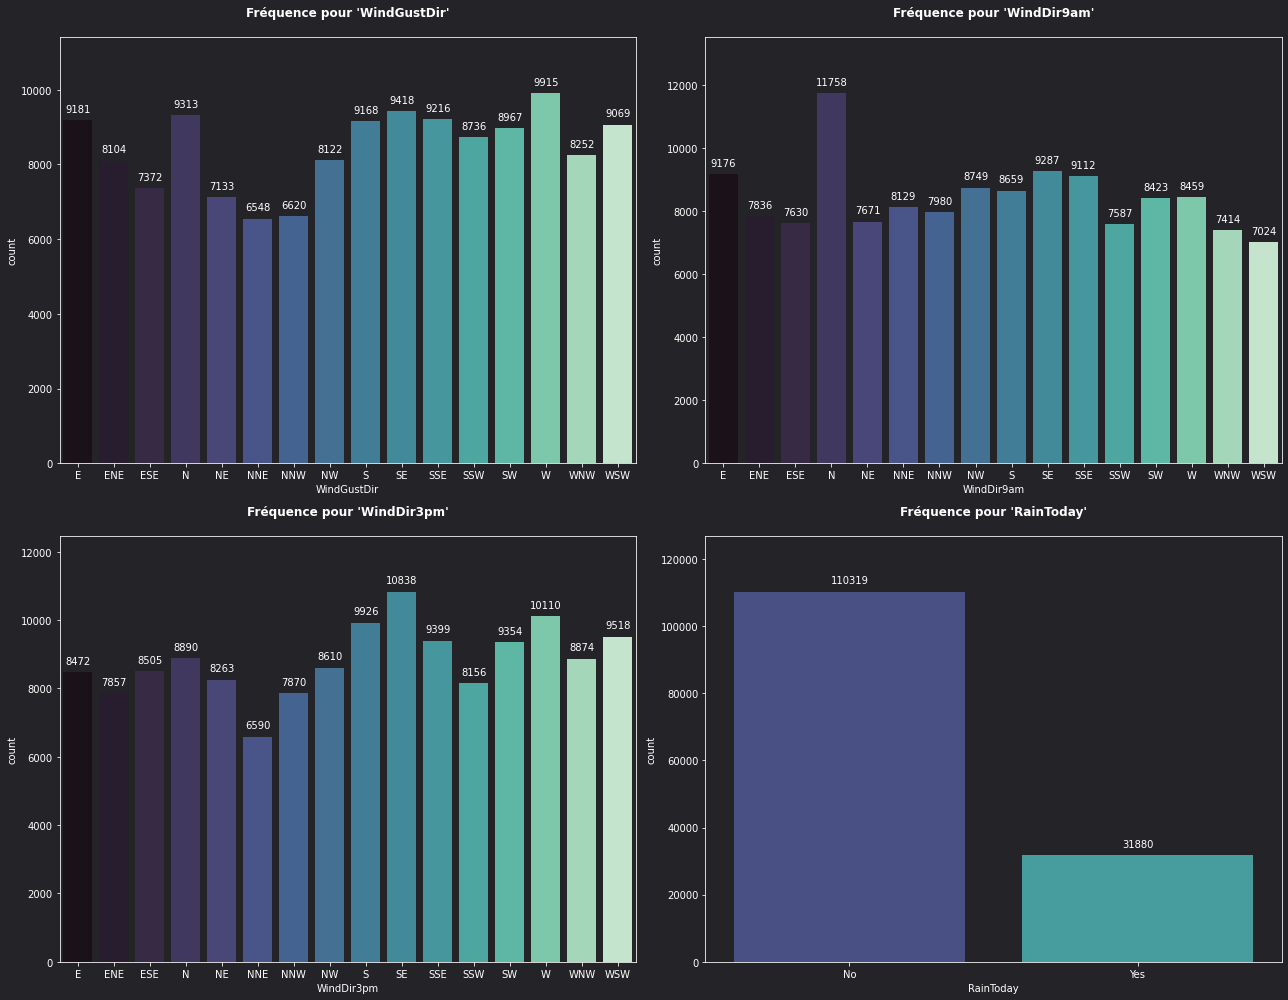

In [65]:
if draw :
    plt.figure(figsize=(18, 14), layout='tight')
    for i, col in enumerate(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']) :
        hi_freq = weather_data[col].value_counts().max()
        plt.subplot(2, 2, i+1)
        plt.title(f"Fréquence pour '{col}'\n")
        ax = sns.countplot(data=weather_data.sort_values(col), x=col, palette='mako')
        ax.bar_label(ax.containers[0], padding=6)
        plt.ylim(top=hi_freq*1.15)
    plt.show()

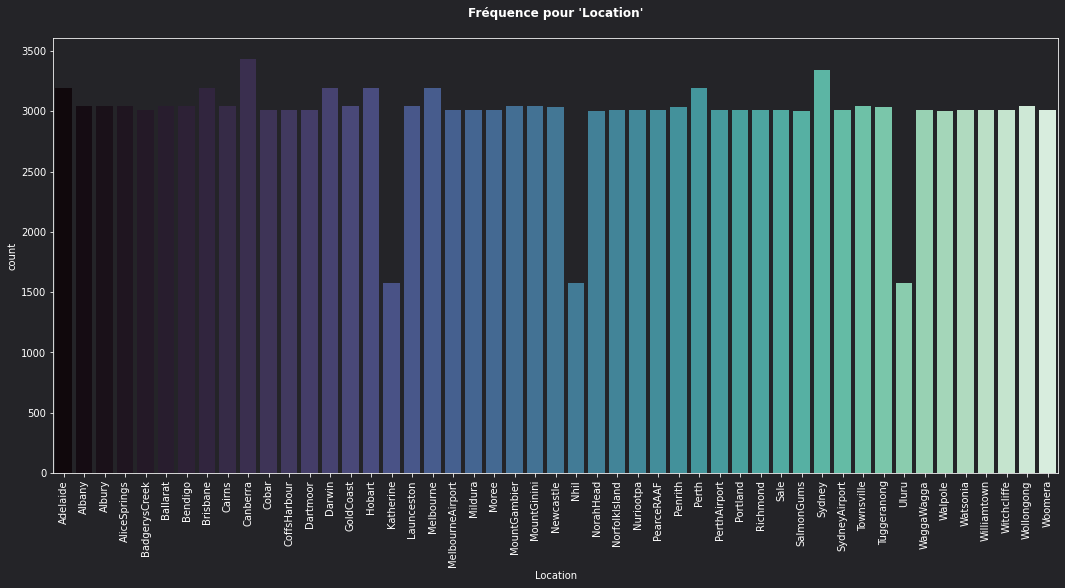

In [151]:
if draw :
    plt.figure(figsize=(18, 8))
    plt.title(f"Fréquence pour 'Location'\n")
    sns.countplot(data=weather_data.sort_values('Location'), x='Location', palette='mako')
    plt.xticks(rotation=90)
    plt.show()

**Observations**

> —
> 
> ❕ Les distributions de `WinDir9am` et `WinDir3pm` présente plusieurs différences. Hormis 3 villes, **Katherine**, **Nhil** et **Uluru**, où l'on a enregistré moitié moins de données, la distribution est assez uniforme pour la variable `Location`
>
> ❓ _Est-ce la variable `WinDir3pm` est plus corrélée avec la cible que la variable `WinDir9am` ? Est-ce qu'une moyenne de ces deux variables pourrait être mieux correlée que la variable `WinDir3pm` seule ?_ 
> 
> — 

---
### **3.** Analyse bivariée

##### **3.1** - Variables quantitatives continues

Distributions selon la cible

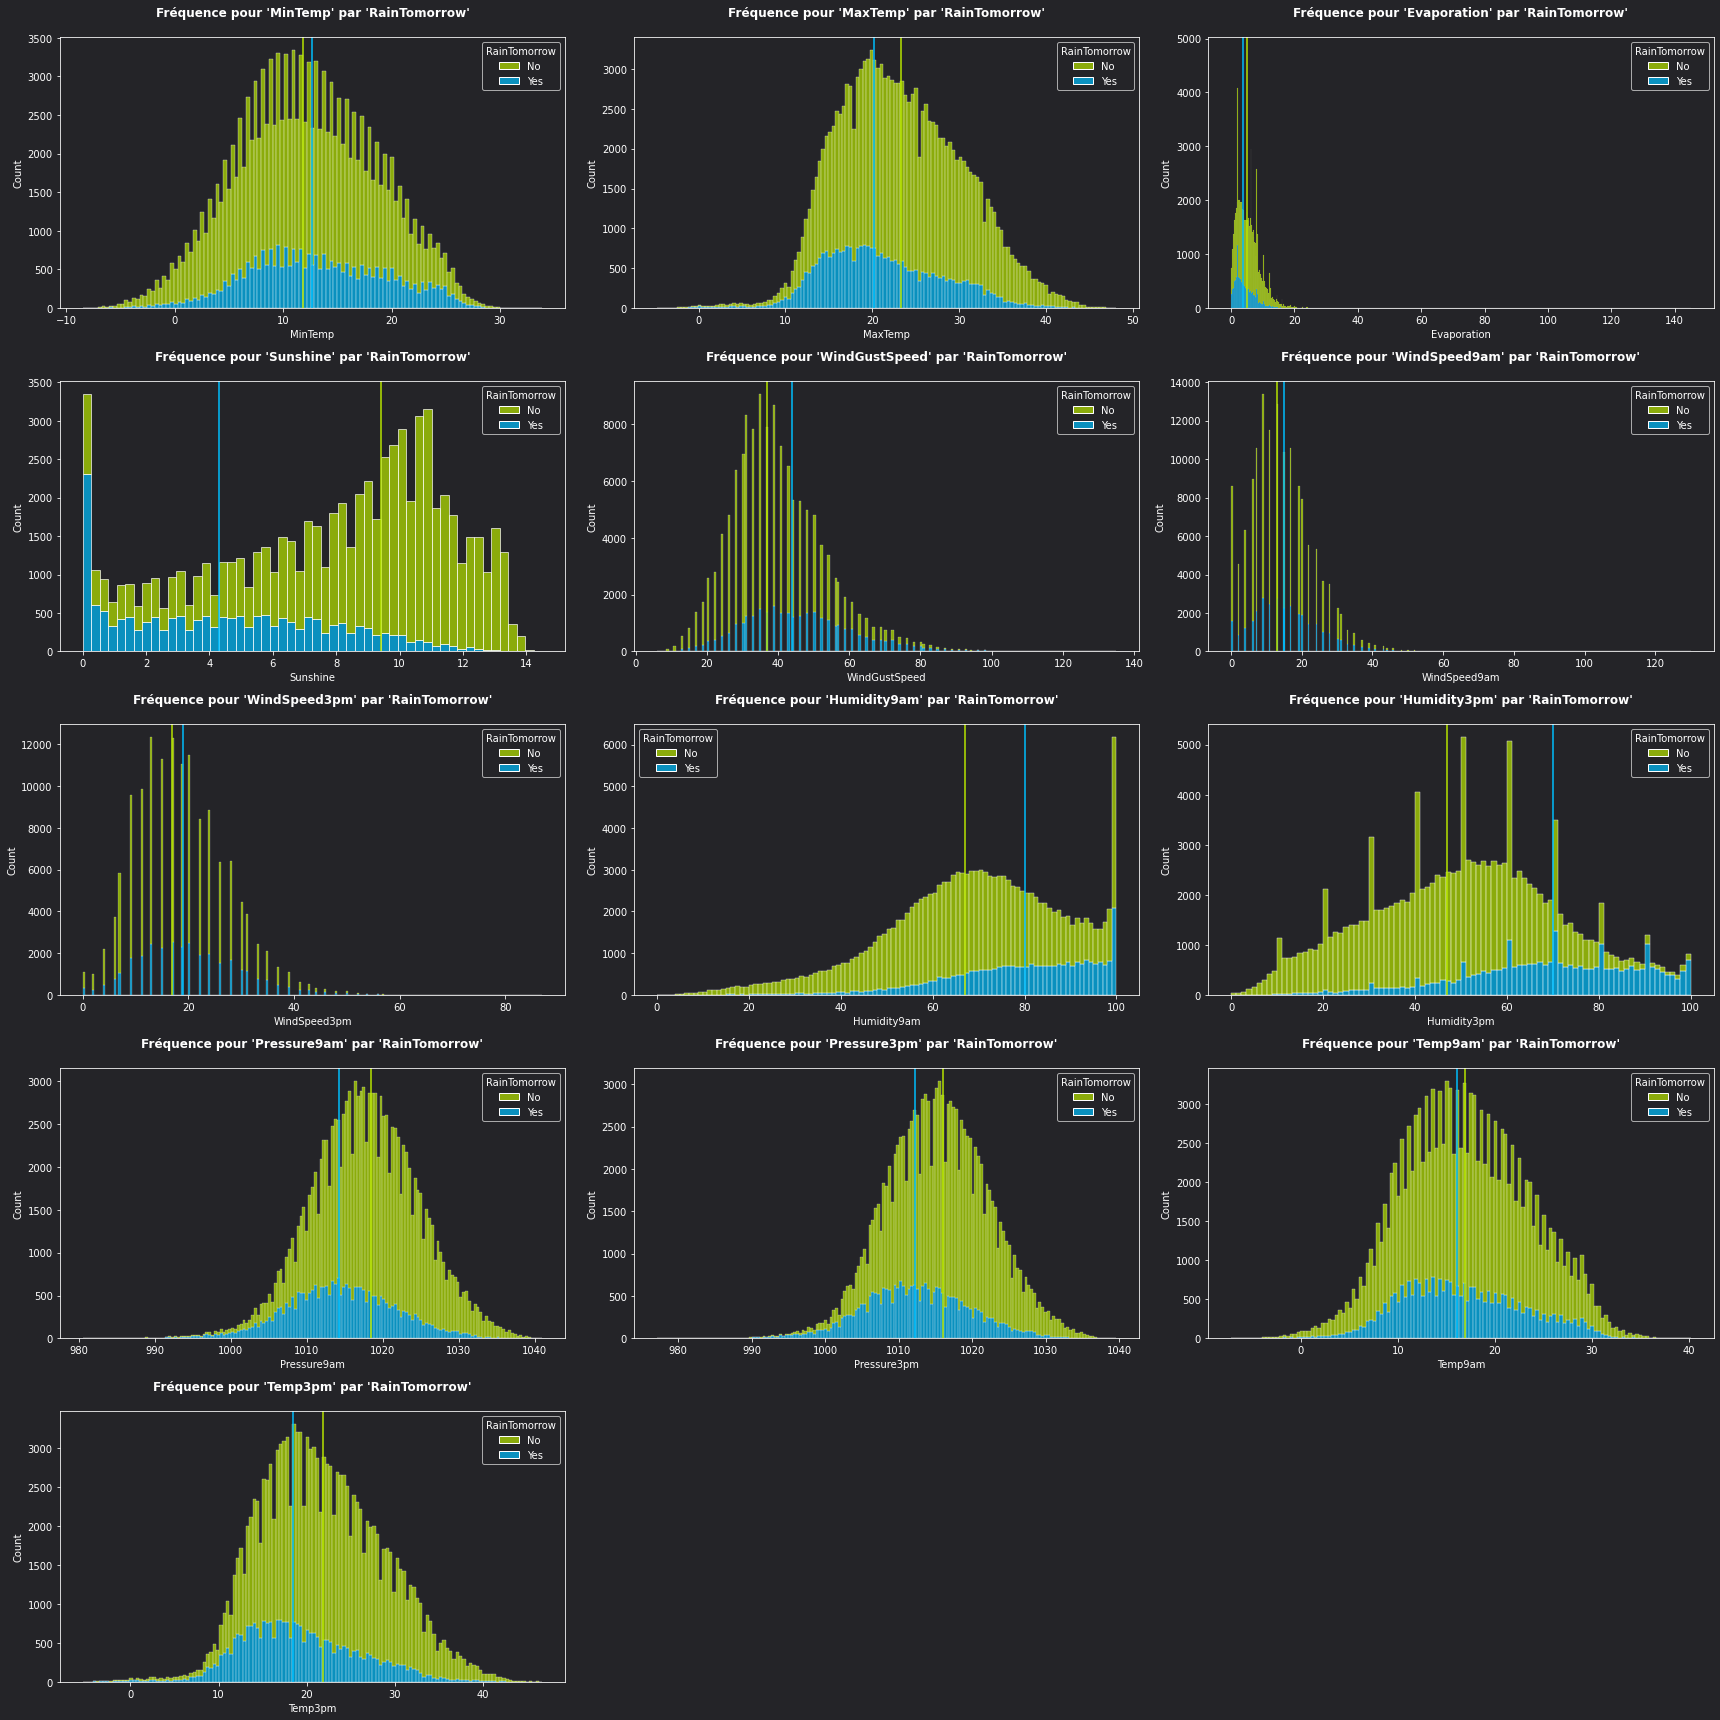

In [67]:
if draw :
    plt.figure(figsize=(24, 24), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(5, 3, i+1)
        plt.title(f"Fréquence pour '{col}' par 'RainTomorrow'\n")
        sns.histplot(data=weather_data, x=col, hue='RainTomorrow', hue_order=['No', 'Yes'], multiple='stack', alpha=.7, palette=palette_c)
        plt.axvline(weather_data.loc[weather_data['RainTomorrow'] == 'No', col].median(), c=palette_c[0])
        plt.axvline(weather_data.loc[weather_data['RainTomorrow'] == 'Yes', col].median(), c=palette_c[1])

    plt.show()

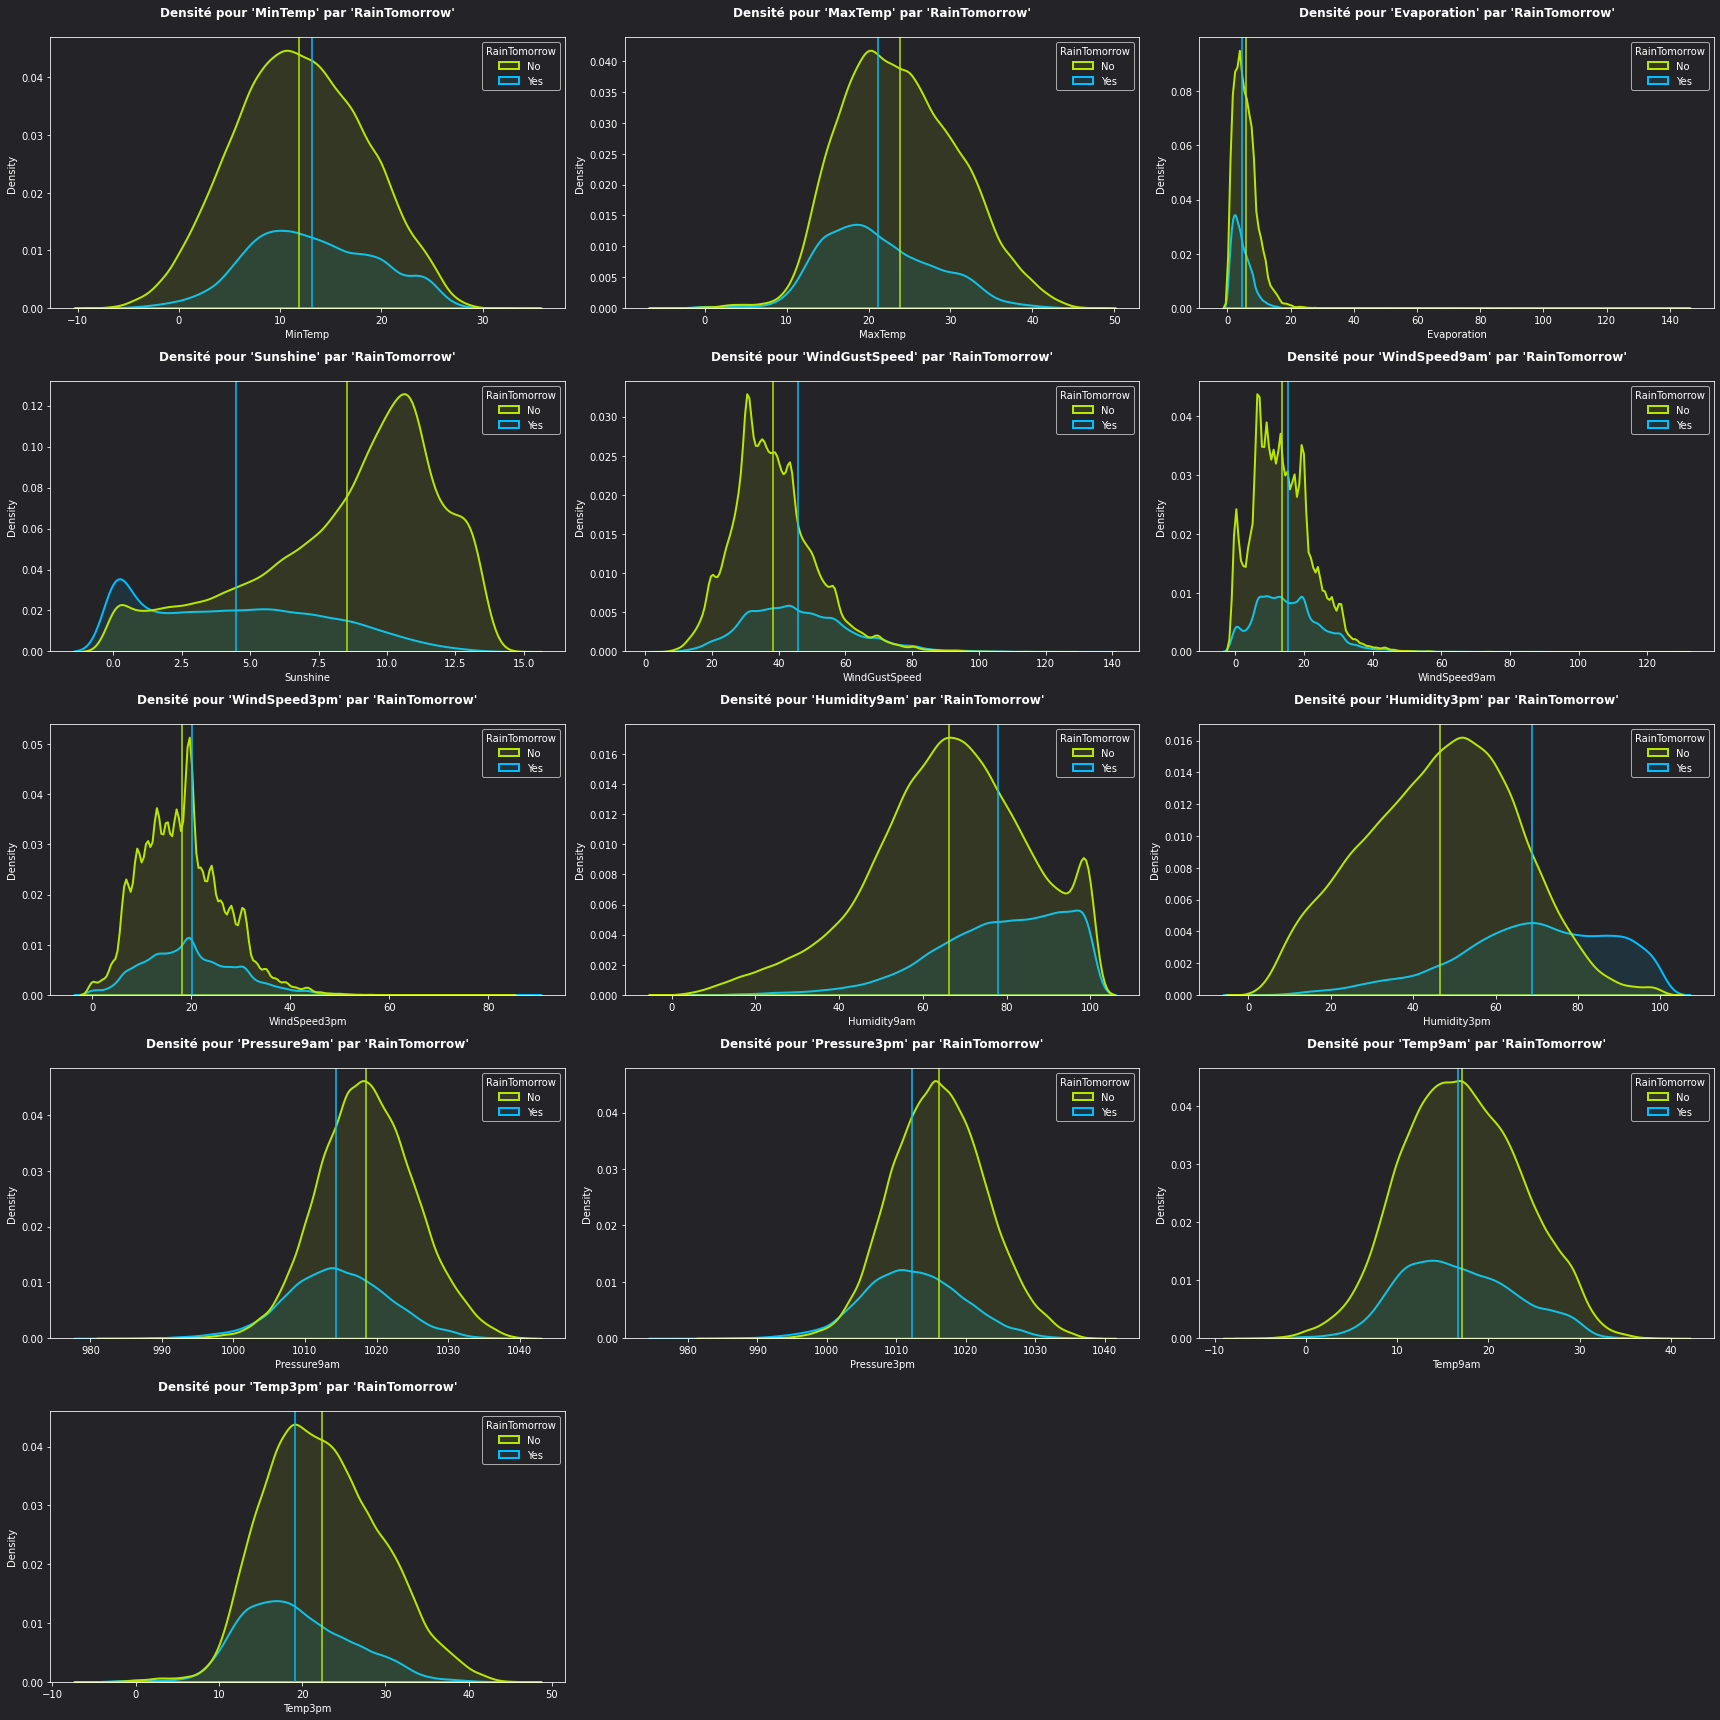

In [68]:
if draw : 
    plt.figure(figsize=(24, 24), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(5, 3, i+1)
        plt.title(f"Densité pour '{col}' par 'RainTomorrow'\n")
        sns.kdeplot(data=weather_data.sort_values('RainTomorrow'), x=col, hue='RainTomorrow', alpha=.1, linewidth=2, fill=True, palette=palette_c)
        plt.axvline(weather_data.loc[weather_data['RainTomorrow'] == 'No', col].mean(), c=palette_c[0])
        plt.axvline(weather_data.loc[weather_data['RainTomorrow'] == 'Yes', col].mean(), c=palette_c[1])

    plt.show()

Variable `Rainfall`

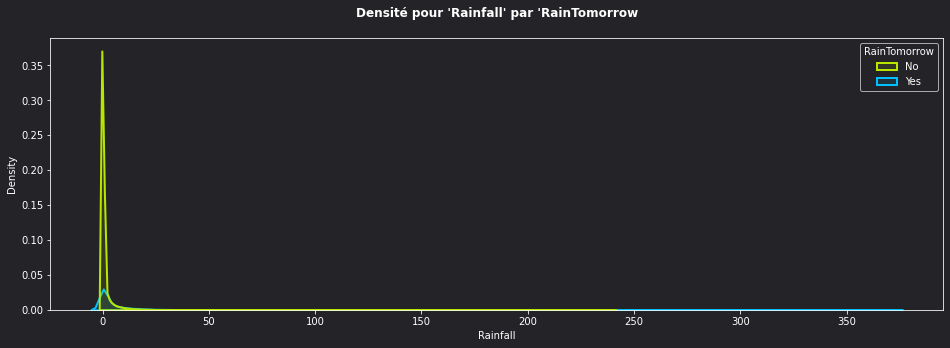

In [69]:
if draw :
    plt.figure(figsize=(16, 5))
    plt.title(f"Densité pour 'Rainfall' par 'RainTomorrow\n")
    sns.kdeplot(data=weather_data, x='Rainfall', hue='RainTomorrow', hue_order=['No', 'Yes'], alpha=.1, linewidth=2, fill=True, palette=palette_c)
    plt.show()

Valeurs aberrantes par cible et valeurs nulles

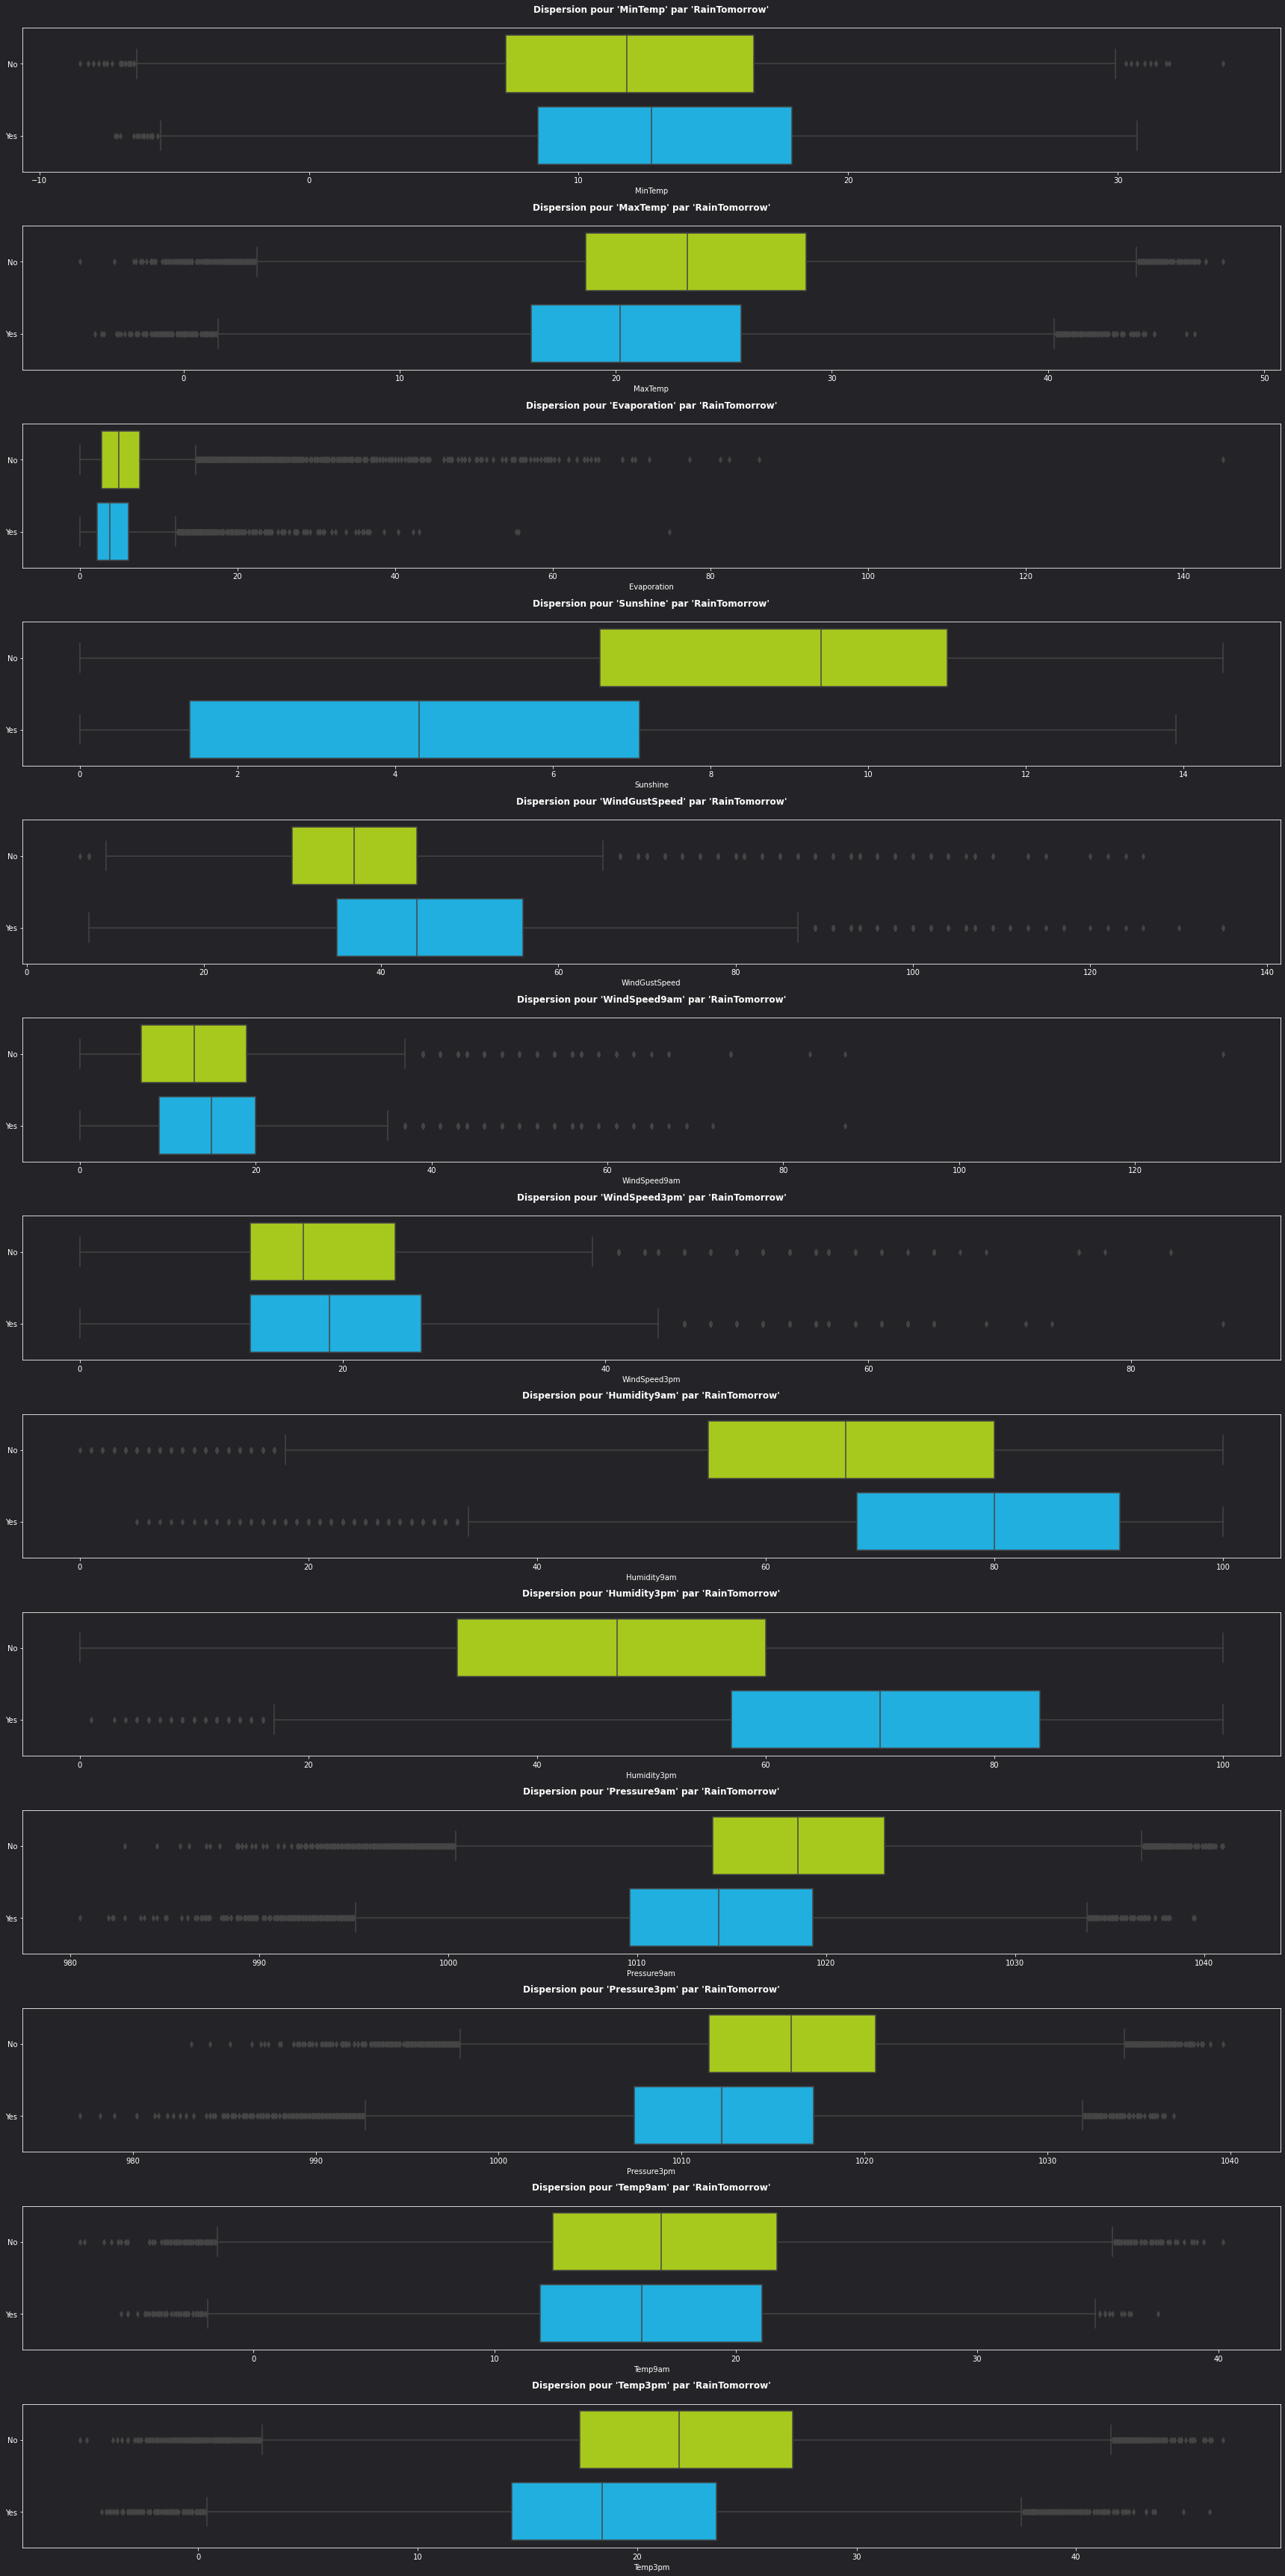

In [81]:
if draw :
    plt.figure(figsize=(24, 48), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(13, 1, i+1)
        plt.title(f"Dispersion pour '{col}' par 'RainTomorrow'\n")
        sns.boxplot(data=weather_data.sort_values('RainTomorrow'), x=col, y='RainTomorrow', palette=palette_c)
        plt.ylabel('')

    plt.show()

Résumé

In [13]:
for col in continous :
    display(weather_data[[col, 'RainTomorrow']].groupby('RainTomorrow').describe().reset_index())

RainTomorrow   MinTemp                                                 
                   count       mean       std  min  25%   50%   75%   max
0           No  109854.0  11.897675  6.398699 -8.5  7.3  11.8  16.5  33.9
1          Yes   31702.0  13.186890  6.317971 -7.2  8.5  12.7  17.9  30.7

RainTomorrow   MaxTemp                                                  
                   count       mean       std  min   25%   50%   75%   max
0           No  110049.0  23.836247  7.059825 -4.8  18.6  23.3  28.8  48.1
1          Yes   31822.0  21.119100  6.911485 -4.1  16.1  20.2  25.8  46.8

RainTomorrow Evaporation                                               
                     count      mean       std  min  25%  50%  75%    max
0           No     63491.0  5.734807  4.332891  0.0  2.8  5.0  7.6  145.0
1          Yes     17859.0  4.527779  3.469052  0.0  2.2  3.8  6.2   74.8

RainTomorrow Sunshine                                               
                  count      mean       std  min  25%  50%   75%   max
0           No  57556.0  8.546358  3.380298  0.0  6.6  9.4  11.0  14.5
1          Yes  16821.0  4.471761  3.359329  0.0  1.4  4.3   7.1  13.9

RainTomorrow WindGustSpeed                                               \
                       count       mean        std  min   25%   50%   75%   
0           No      103488.0  38.288391  12.406522  6.0  30.0  37.0  44.0   
1          Yes       29435.0  45.946764  15.717954  7.0  35.0  44.0  56.0   

          
     max  
0  126.0  
1  135.0

RainTomorrow WindSpeed9am                                                  
                      count       mean       std  min  25%   50%   75%    max
0           No     109308.0  13.567314  8.627578  0.0  7.0  13.0  19.0  130.0
1          Yes      31537.0  15.508577  9.607733  0.0  9.0  15.0  20.0   87.0

RainTomorrow WindSpeed3pm                                                  
                      count       mean       std  min   25%   50%   75%   max
0           No     108369.0  18.222804  8.455466  0.0  13.0  17.0  24.0  83.0
1          Yes      31194.0  20.078509  9.781914  0.0  13.0  19.0  26.0  87.0

RainTomorrow Humidity9am                                                    
                     count       mean        std  min   25%   50%   75%    max
0           No    109076.0  66.217573  19.020703  0.0  55.0  67.0  80.0  100.0
1          Yes     31343.0  77.983314  16.108377  5.0  68.0  80.0  91.0  100.0

RainTomorrow Humidity3pm                                                    
                     count       mean        std  min   25%   50%   75%    max
0           No    107670.0  46.510625  18.489476  0.0  33.0  47.0  60.0  100.0
1          Yes     30913.0  68.800019  19.037409  1.0  57.0  70.0  84.0  100.0

RainTomorrow Pressure9am                                                \
                     count         mean       std    min     25%     50%   
0           No     99405.0  1018.595599  6.760700  982.9  1014.0  1018.5   
1          Yes     28774.0  1014.400000  7.304373  980.5  1009.6  1014.3   

                   
      75%     max  
0  1023.1  1041.0  
1  1019.3  1039.5

RainTomorrow Pressure3pm                                                \
                     count         mean       std    min     25%     50%   
0           No     99448.0  1016.113587  6.710292  983.2  1011.5  1016.0   
1          Yes     28764.0  1012.300820  7.331664  977.1  1007.4  1012.2   

                   
      75%     max  
0  1020.6  1039.6  
1  1017.2  1036.9

RainTomorrow   Temp9am                                                  
                   count       mean       std  min   25%   50%   75%   max
0           No  109710.0  17.077001  6.522764 -7.2  12.4  16.9  21.7  40.2
1          Yes   31579.0  16.676598  6.378134 -5.5  11.9  16.1  21.1  37.5

RainTomorrow   Temp3pm                                                  
                   count       mean       std  min   25%   50%   75%   max
0           No  108332.0  22.402905  6.850466 -5.4  17.4  21.9  27.1  46.7
1          Yes   31135.0  19.197113  6.657981 -4.4  14.3  18.4  23.6  46.1

Dépendances dans les dispersions

In [42]:
if draw :
    gd = sns.PairGrid(weather_data[continous + ['RainTomorrow']], diag_sharey=False, corner=True, hue='RainTomorrow', hue_order=['No', 'Yes'], height=5, palette=palette_c)
    gd.map_lower(sns.kdeplot)
    gd.map_diag(sns.kdeplot)

**Observations**

> —
> 
> ❕ Les variables `Temp9am` et `Temp3pm`, `MinTemp` et `MaxTemp` et `Sunshine` présentent une très faible différence d'écart-types entre les 'Yes'/'No'. 
> 
> —

##### **3.2** - Variables quantitatives discrètes

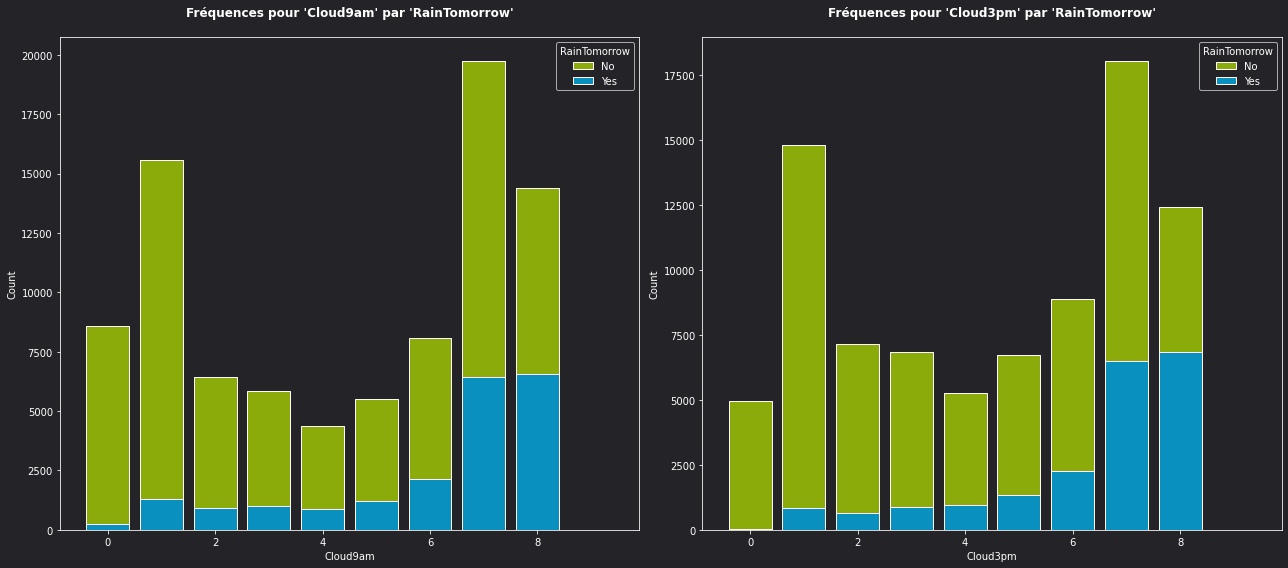

In [159]:
if draw :
    plt.figure(figsize=(18, 8), layout='tight')
    for i, col in enumerate(discretes) :
        plt.subplot(1, 2, i+1)
        plt.title(f"Fréquences pour '{col}' par 'RainTomorrow'\n")
        sns.histplot(data=weather_data, x=col, hue='RainTomorrow', hue_order=['No', 'Yes'], multiple='stack', alpha=.7, discrete=True, shrink=.8, palette=palette_c)
    plt.show()

In [14]:
for col in discretes :
    display(weather_data[[col, 'RainTomorrow']].groupby('RainTomorrow').describe().reset_index())

RainTomorrow Cloud9am                                             
                  count      mean       std  min  25%  50%  75%  max
0           No  67914.0  3.932282  2.877299  0.0  1.0  4.0  7.0  9.0
1          Yes  20622.0  6.099990  2.216997  0.0  5.0  7.0  8.0  8.0

RainTomorrow Cloud3pm                                             
                  count      mean       std  min  25%  50%  75%  max
0           No  64811.0  3.921896  2.667284  0.0  1.0  4.0  7.0  9.0
1          Yes  20288.0  6.360065  1.947514  0.0  6.0  7.0  8.0  8.0

**Observations**

> —
> 
> ❕ Les distributions des lendemains pluvieux pour `Cloud9am` et `Cloud3pm` ne présentent pas de grandes différences. Elles "raccontent" un peu la même chose.
> 
> —

##### **3.3** - Variables qualitatives

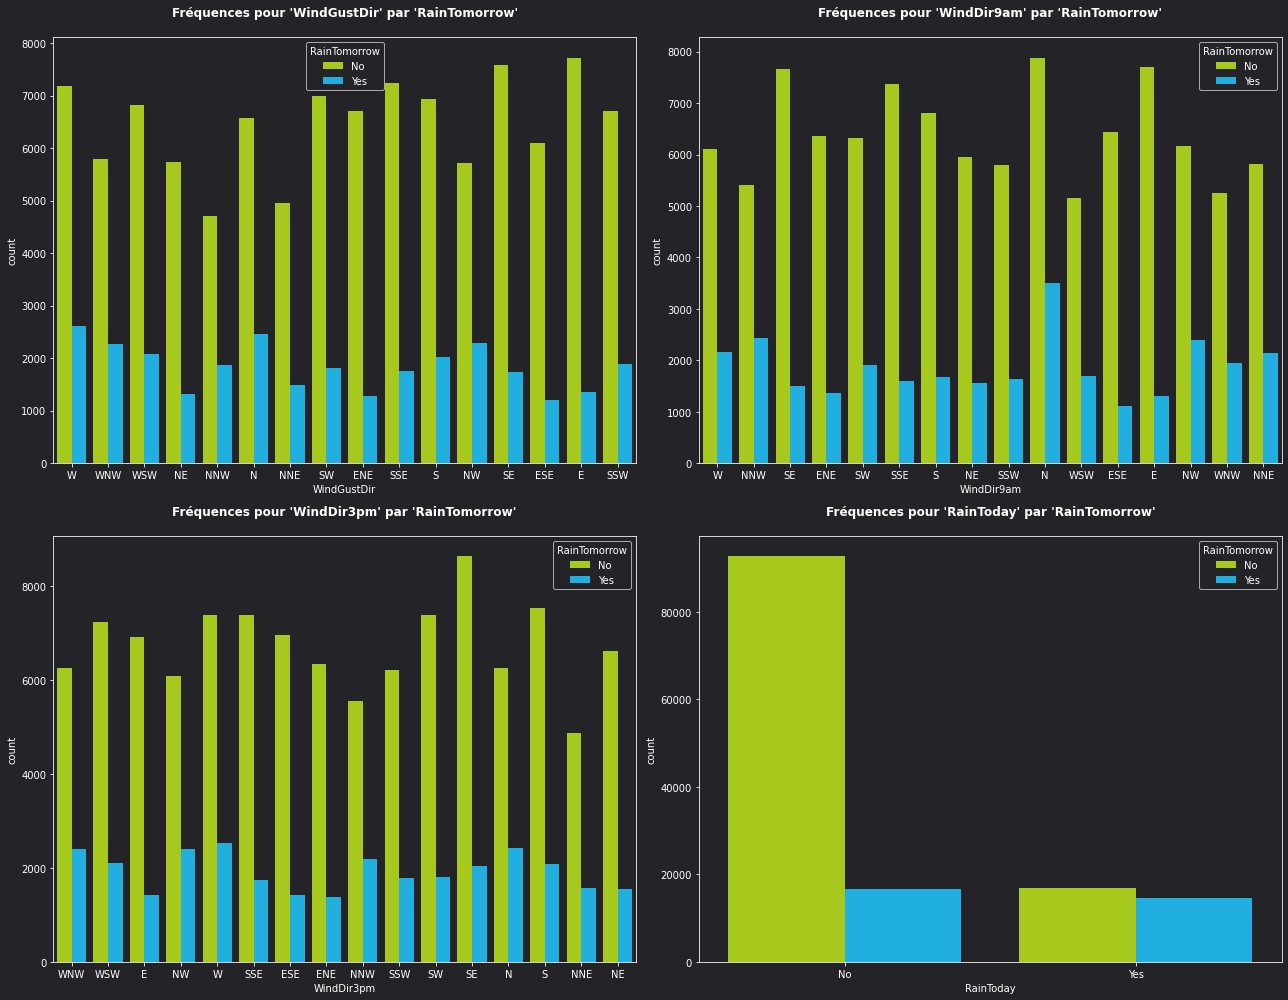

In [71]:
if draw :
    plt.figure(figsize=(18, 14), layout='tight')
    for i, col in enumerate(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']) :
        plt.subplot(2, 2, i+1)
        plt.title(f"Fréquences pour '{col}' par 'RainTomorrow'\n")
        sns.countplot(data=weather_data, x=col, hue='RainTomorrow', hue_order=['No', 'Yes'], palette=palette_c)
    plt.show()

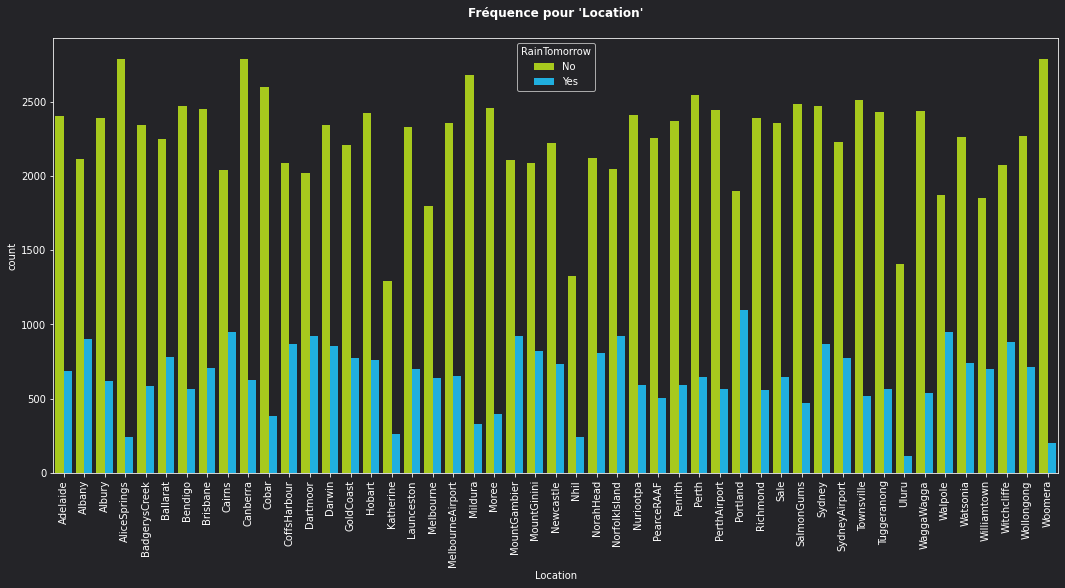

In [152]:
# (!) - Location
if draw :
    plt.figure(figsize=(18, 8))
    plt.title(f"Fréquence pour 'Location'\n")
    sns.countplot(data=weather_data.sort_values('Location'), x='Location', hue='RainTomorrow', hue_order=['No', 'Yes'], palette=palette_c)
    plt.xticks(rotation=90)
    plt.show()

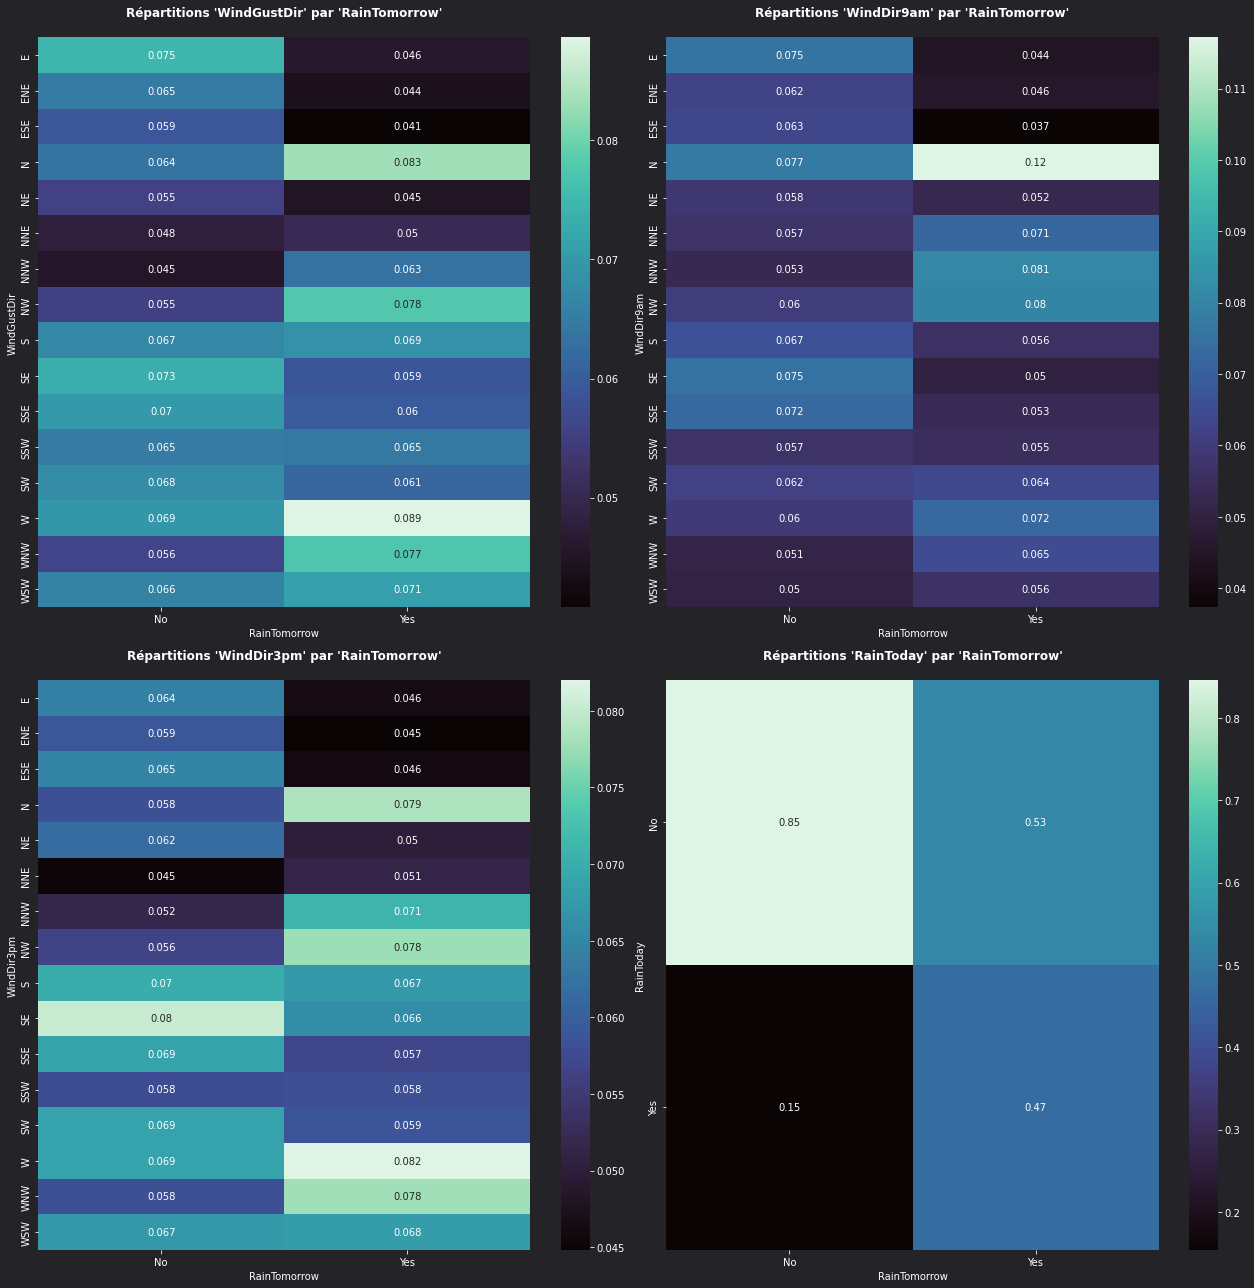

In [157]:
if draw :
    plt.figure(figsize=(18, 18), layout='tight')
    for i, col in enumerate(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']) :
        ctb = pd.crosstab(weather_data[col], weather_data['RainTomorrow'], normalize='columns')
        plt.subplot(2, 2, i+1)
        plt.title(f"Répartitions '{col}' par 'RainTomorrow'\n")
        sns.heatmap(ctb, annot=True, cmap='mako')
    plt.show()

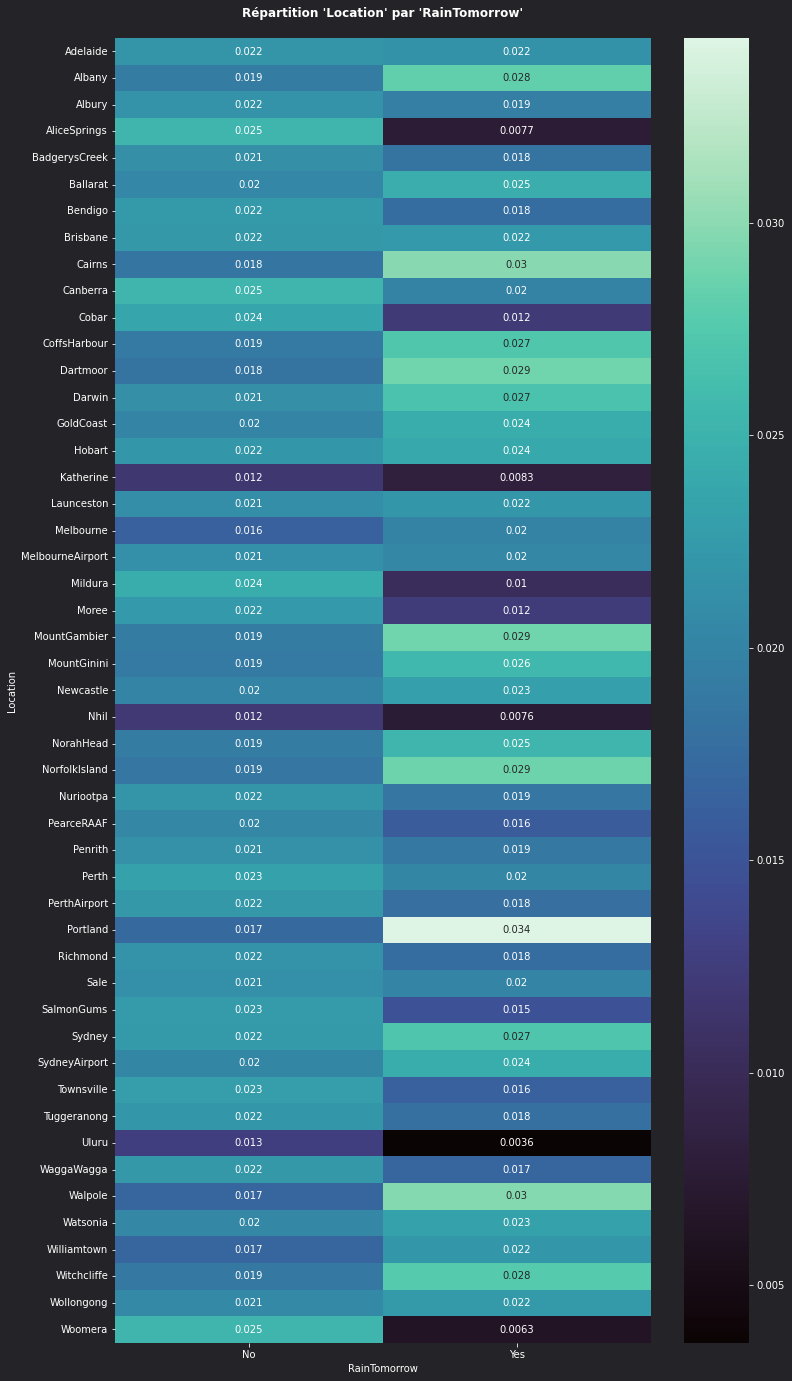

In [156]:
if draw :
    plt.figure(figsize=(12, 24))
    ctb = pd.crosstab(weather_data['Location'], weather_data['RainTomorrow'], normalize='columns')
    plt.title(f"Répartition 'Location' par 'RainTomorrow'\n")
    sns.heatmap(ctb, annot=True, cmap='mako')
    plt.show()

**Observations**

> —
> 
> ❕ La variables `RainToday` est très intéressante. Quant aux autres, il n'y a pas de distinctions extrêmement marquées.
> 
> —

##### **3.4** - Statistiques

In [22]:
# (!) - Adjustments for computing
no_yes_v = {
    'No': 0, 
    'Yes': 1
}
weather_df = weather_data.copy()
weather_df['RainTomorrow'] = weather_df['RainTomorrow'].map(no_yes_v)
weather_df['RainToday'] = weather_df['RainToday'].map(no_yes_v)

weather_corr = weather_df.corr(method='pearson')

Liens de corrélations

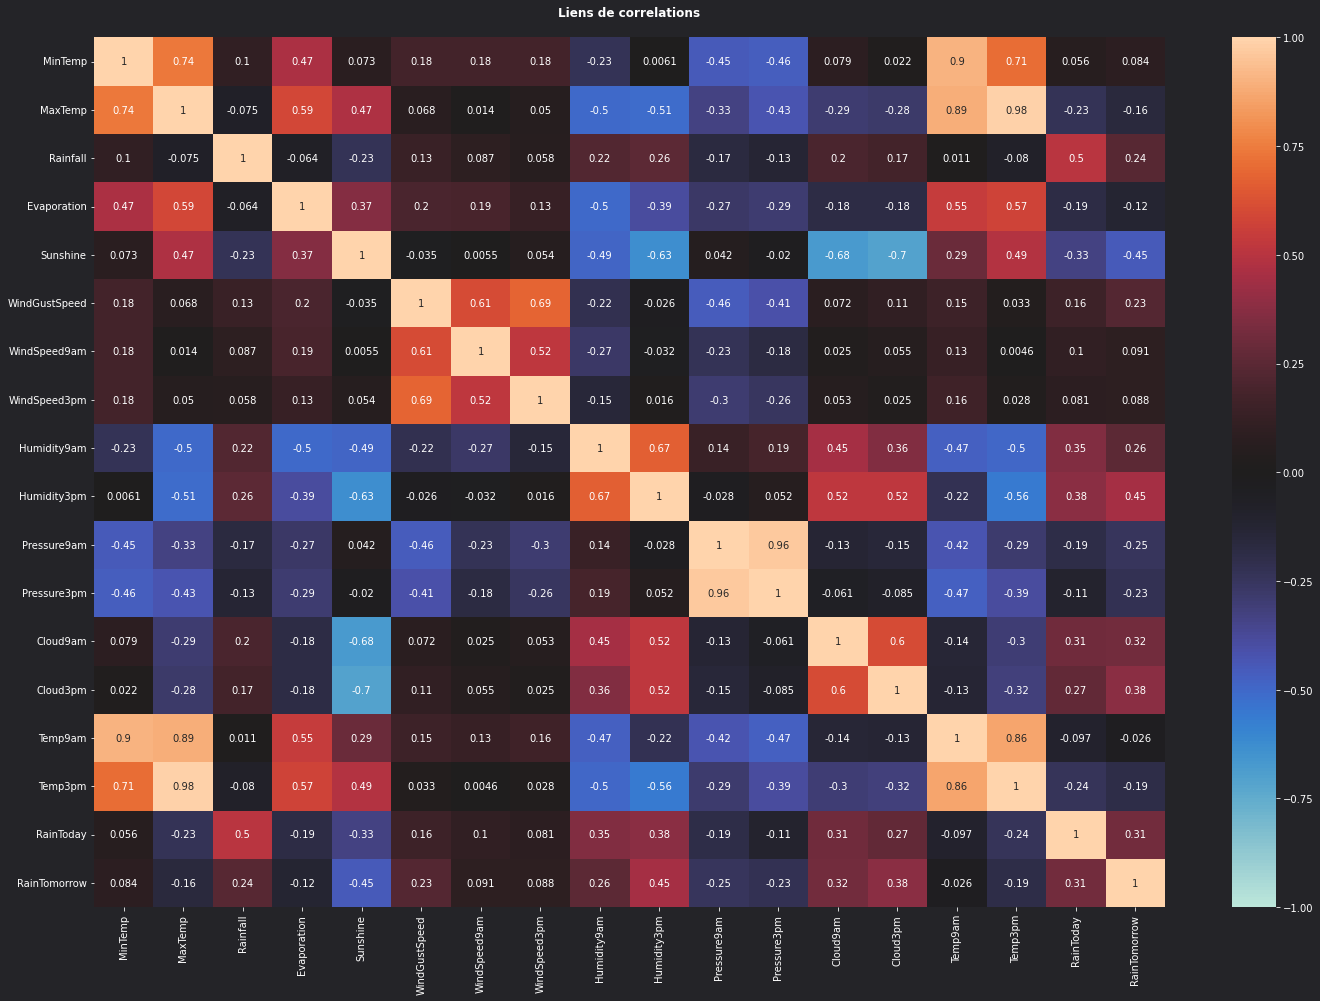

In [21]:
if draw :
    plt.figure(figsize=(24, 16))
    plt.title("Liens de correlations\n")
    sns.heatmap(weather_corr, vmin=-1, vmax=1, cmap="icefire", annot=True)
    plt.show()

In [23]:
# (!) - List low correlations with target
low_corr = weather_corr.loc[(weather_corr['RainTomorrow'] > -0.15) & (weather_corr['RainTomorrow'] < 0.15), 'RainTomorrow']
pd.DataFrame({
    'Correlations faibles avec la cible': low_corr.sort_values(ascending=False)
})

,Correlations faibles avec la cible
WindSpeed9am,0.090995
WindSpeed3pm,0.087817
MinTemp,0.083936
Temp9am,-0.025691
Evaporation,-0.119285


Résumé

In [25]:
std_by_target = weather_df.groupby('RainTomorrow').std()
std_by_target.reset_index(inplace=True)

std_by_target = std_by_target.T

std_by_target.rename(columns={0:'RainTomorow No', 1:'RainTomorow Yes'}, inplace=True)

std_by_target['Différences Yes/No'] = std_by_target['RainTomorow No'] - std_by_target['RainTomorow Yes']
std_by_target['Correlations RainTomorrow'] = weather_corr['RainTomorrow']

std_by_target.sort_values('Correlations RainTomorrow')

,RainTomorow No,RainTomorow Yes,Différences Yes/No,Correlations RainTomorrow
Sunshine,3.380298,3.359329,0.020969,-0.450768
Pressure9am,6.760700,7.304373,-0.543672,-0.246371
Pressure3pm,6.710292,7.331664,-0.621372,-0.226031
Temp3pm,6.850466,6.657981,0.192485,-0.192424
MaxTemp,7.059825,6.911485,0.148340,-0.159237
Evaporation,4.332891,3.469052,0.863839,-0.119285
Temp9am,6.522764,6.378134,0.144629,-0.025691
MinTemp,6.398699,6.317971,0.080728,0.083936
WindSpeed3pm,8.455466,9.781914,-1.326449,0.087817
WindSpeed9am,8.627578,9.607733,-0.980155,0.090995


In [53]:
# (!) - Is correlation better with mean between 'Pressure9am' / 'Pressure3pm' ? 
if draw : 
    weather_df['PressureMean'] = np.nan
    weather_df['PressureMean'] = weather_df[['Pressure9am', 'Pressure3pm']].mean(axis=1)

    plt.figure(figsize=(10, 8))
    plt.title("Correlations pour 'Pressure9am/3pm' et une moyenne des 'Pressure9am/3pm'\n")
    sns.heatmap(weather_df[['Pressure9am', 'Pressure3pm', 'PressureMean', 'RainTomorrow']].corr(method='pearson'), vmin=-1, vmax=1, cmap="icefire", annot=True)
    plt.show()

**Observations**

> — 
>
> ❕ Les corrélations de `Cloud9am` et `Cloud3pm` avec la cible sont presque semblables, et leurs distributions également. Une moyenne ne sera pas nécessaire, et la variable `Cloud9am` pourrait tout simplement être supprimée. 
>
> ❕ La variable `Pressure9am` est _étrangement_ plus corrélée avec la cible que `Pressure3pm`, et leurs distributions et statistiques sont pratiquement équivalentes.
> 
> Les variables `WindSpeed9am`, `WindSpeed3pm`, `MinTemp`, `Temp9am` et `Evaporation` sont faiblement corrélées avec la cible.
>
> — 

---

### **4.** Finalisation

##### **4.1** - Conclusion

**Suppressions**

✔️ Les variables qui contiennent des **mesures météo enregistrées à 15h00** sont _forcément_ plus pertinentes pour indiquer s'il va pleuvoir le lendemain. Elles seront donc à privilégier sur celles qui contiennent des **mesures météo enregistrées à 9h00**.

* `Rainfall` => statistiques et distribution farfelues
* `Temp9am` => faible différence d'écart-types entre 'Yes'/'No', faible corrélation avec la cible
* `MinTemp` => faible différence d'écart-types entre 'Yes'/'No', faible corrélation avec la cible
* `WinSpeed9am` et `WinSpeed3pm` => faibles corrélations avec la cible, distinction de 'Yes'/'No' dans la distribution moins marquée qu'avec `WindGustSpeed`
* `Humidity9am` => moins corrélée que `Humidity3pm`
* `Cloud9am` => moins corrélée que `Cloud3pm`
* `Pressure9am` et `Pressure3pm` => création d'une moyenne des valeurs, puisque la 1<sup>re</sup> variable est étrangement plus corrélée avec la cible que sa suivante, et que leurs distributions et statistiques sont pratiquement équivalentes.
* `WindDir9am` => puisque les valeurs `WindDir3pm` sont plus proche du du lendemain

✔️ Les variables `Temp3pm` et `MaxTemp` sont bien corrélées avec la cible mais présentent une distribution sensiblement similaire.

* `MaxTemp` => corrélation plus faible avec la cible

⭕️ Décision suspendue pour les variables `Location`, `WindGustDir` et `WindDir3pm`... Si leurs transformations sont trop longues ou complexes, elles seront supprimées.

**Encodage**

✔️ `Date` : créer une _feature_ binaire `WetSeason` 0/1, ou ordinale par probabilités progressives de pluie selon `RainToday` ( **!** ) 0 = coeur DrySeason, 1 = début/fin DrySeason, 2 = début/fin WetSeason, 3 = coeur WetSeason

✔️ `Cloud3pm` : encodage ordinal de 0 à 9.

##### **4.2** - Traitement

**Préparation**

In [27]:
to_drop = ['Rainfall', 'Temp9am', 'MinTemp', 'MaxTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Cloud9am', 'WindDir9am']
weather_prepared = weather_data.drop(columns=to_drop)

In [28]:
weather_prepared['Pressure'] = np.nan
weather_prepared['Pressure'] = weather_prepared[['Pressure9am', 'Pressure3pm']].mean(axis=1)

weather_prepared.drop(columns=['Pressure9am', 'Pressure3pm'], inplace=True)

weather_prepared

,Date,Location,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,Humidity3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Pressure
0,2008-12-01,Albury,NaN,NaN,W,44.0,WNW,22.0,NaN,21.8,No,No,1007.40
1,2008-12-02,Albury,NaN,NaN,WNW,44.0,WSW,25.0,NaN,24.3,No,No,1009.20
2,2008-12-03,Albury,NaN,NaN,WSW,46.0,WSW,30.0,2.0,23.2,No,No,1008.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145457,2017-06-23,Uluru,NaN,NaN,N,37.0,WNW,24.0,NaN,26.1,No,No,1018.90
145458,2017-06-24,Uluru,NaN,NaN,SE,28.0,N,24.0,2.0,26.0,No,No,1017.95
145459,2017-06-25,Uluru,NaN,NaN,NaN,NaN,ESE,36.0,8.0,20.9,No,NaN,1019.05


**Exportation**

In [195]:
weather_prepared.to_csv('./_datasets/weather_data_prepare.csv', index=False)